
# Plotnine: Grammar of Graphics for Python
### A translation of the visualisation chapters from "R for Data Science" to Python using Plotnine and Pandas.

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/datascienceworkshops/r4ds-python-plotnine/master?filepath=output%2Fr4ds-python-plotnine.ipynb)

<img src="../input/images/cover.png" width="250" style="margin-left: 0px;">

# [3](https://r4ds.had.co.nz/data-visualisation.html)&nbsp;&nbsp;&nbsp;Data visualisation

## [3.1](https://r4ds.had.co.nz/data-visualisation.html#introduction-1)&nbsp;&nbsp;&nbsp;Introduction

> "The simple graph has brought more information to the data analyst’s mind 
> than any other device." --- John Tukey

This post will teach you how to visualise your data using plotnine. Python has many packages for making graphs, but plotnine is one of the most elegant and most versatile. plotnine implements the __grammar of graphics__, a coherent system for describing and building graphs. With plotnine, you can do more faster by learning one system and applying it in many places.

If you'd like to learn more about the theoretical underpinnings of plotnine before you start, I'd recommend reading [The Layered Grammar of Graphics](http://vita.had.co.nz/papers/layered-grammar.pdf).

### [3.1.1](https://r4ds.had.co.nz/data-visualisation.html#prerequisites-1)&nbsp;&nbsp;&nbsp;Prerequisites

This post focusses on plotnine. We'll also use a little numpy and pandas for data manipulation. To access the datasets, help pages, and functions that we will use in this post, import the necessary packages by running this code:

In [1]:
from plotnine import *
from plotnine.data import *

import numpy as np
import pandas as pd

In [2]:
import warnings
pd.set_option("display.max_rows", 10)

from matplotlib import rcParams
rcParams.update({"figure.max_open_warning": 0,
                 "savefig.bbox": "tight"})

theme_set(theme_gray(base_size=12))

If you run this code and get the error message `ModuleNotFoundError: No module named 'plotnine'`, you'll need to first install it, then run the code once again.

```
! pip install plotnine[all]
```

You only need to install a package once, but you need to reload it every time you start a new session.

## [3.2](https://r4ds.had.co.nz/data-visualisation.html#first-steps)&nbsp;&nbsp;&nbsp;First steps

Let's use our first graph to answer a question: Do cars with big engines use more fuel than cars with small engines? You probably already have an answer, but try to make your answer precise. What does the relationship between engine size and fuel efficiency look like? Is it positive? Negative? Linear? Nonlinear?

### [3.2.1](https://r4ds.had.co.nz/data-visualisation.html#the-mpg-data-frame)&nbsp;&nbsp;&nbsp;The `mpg` DataFrame

You can test your answer with the `mpg` DataFrame found in `plotnine.data`. A DataFrame is a rectangular collection of variables (in the columns) and observations (in the rows). `mpg` contains observations collected by the US Environmental Protection Agency on 38 models of car. 

In [3]:
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


Among the variables in `mpg` are:

1. `displ`, a car's engine size, in litres.

1. `hwy`, a car's fuel efficiency on the highway, in miles per gallon (mpg). 
  A car with a low fuel efficiency consumes more fuel than a car with a high 
  fuel efficiency when they travel the same distance. 

To learn more about `mpg`, open its help page by running `?mpg`.

### [3.2.2](https://r4ds.had.co.nz/data-visualisation.html#creating-a-ggplot)&nbsp;&nbsp;&nbsp;Creating a ggplot

To plot `mpg`, run this code to put `displ` on the x-axis and `hwy` on the y-axis:

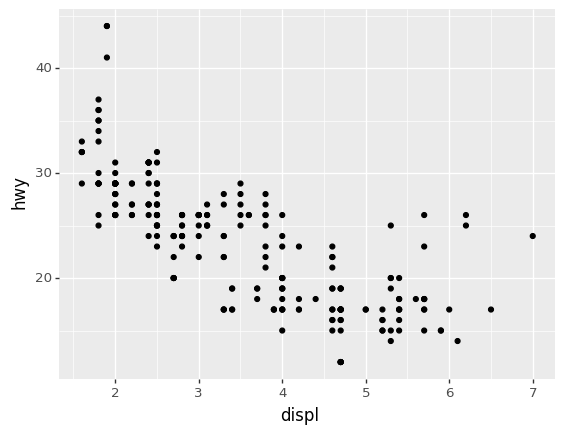

<ggplot: (296429725)>

In [4]:
ggplot(data=mpg) +\
geom_point(mapping=aes(x="displ", y="hwy"))

The plot shows a negative relationship between engine size (`displ`) and fuel efficiency (`hwy`). In other words, cars with big engines use more fuel. Does this confirm or refute your hypothesis about fuel efficiency and engine size?

With plotnine, you begin a plot with the function `ggplot()`. `ggplot()` creates a coordinate system that you can add layers to. The first argument of `ggplot()` is the dataset to use in the graph. So `ggplot(data=mpg)` creates an empty graph, but it's not very interesting so I'm not going to show it here.

You complete your graph by adding one or more layers to `ggplot()`. The function `geom_point()` adds a layer of points to your plot, which creates a scatterplot. plotnine comes with many geom functions that each add a different type of layer to a plot. You'll learn a whole bunch of them throughout this post.

Each geom function in plotnine takes a `mapping` argument. This defines how variables in your dataset are mapped to visual properties. The `mapping` argument is always paired with `aes()`, and the `x` and `y` arguments of `aes()` specify which variables to map to the x and y axes. plotnine looks for the mapped variables in the `data` argument, in this case, `mpg`.

### [3.2.3](https://r4ds.had.co.nz/data-visualisation.html#a-graphing-template)&nbsp;&nbsp;&nbsp;A graphing template

Let's turn this code into a reusable template for making graphs with plotnine. To make a graph, replace the bracketed sections in the code below with a dataset, a geom function, or a collection of mappings.

```
ggplot(data=<DATA>) +\
<GEOM_FUNCTION>(mapping=aes(<MAPPINGS>))
```

The rest of this post will show you how to complete and extend this template to make different types of graphs. We will begin with the `<MAPPINGS>` component.

### [3.2.4](https://r4ds.had.co.nz/data-visualisation.html#exercises)&nbsp;&nbsp;&nbsp;Exercises

1.  Run `ggplot(data=mpg)`. What do you see?

1.  How many rows are in `mpg`? How many columns?

1.  What does the `drv` variable describe?  Read the help for `?mpg` to find
    out.
     
1.  Make a scatterplot of `hwy` vs `cyl`.

1.  What happens if you make a scatterplot of `class` vs `drv`? Why is
    the plot not useful?

## [3.3](https://r4ds.had.co.nz/data-visualisation.html#aesthetic-mappings)&nbsp;&nbsp;&nbsp;Aesthetic mappings

> "The greatest value of a picture is when it forces us to notice what we
> never expected to see." --- John Tukey

In the plot below, one group of points (highlighted in red) seems to fall outside of the linear trend. These cars have a higher mileage than you might expect. How can you explain these cars? 

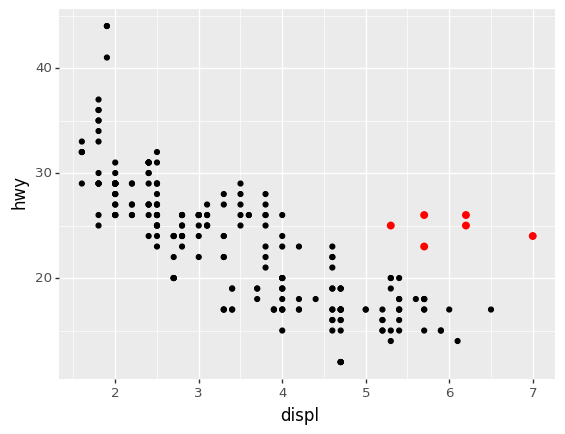

<ggplot: (296481369)>

In [5]:
ggplot(data=mpg, mapping=aes(x="displ", y="hwy")) +\
geom_point() +\
geom_point(data=mpg.query("displ > 5 & hwy > 20"), colour="red", size=2.2)

Let's hypothesize that the cars are hybrids. One way to test this hypothesis is to look at the `class` value for each car. The `class` variable of the `mpg` dataset classifies cars into groups such as compact, midsize, and SUV. If the outlying points are hybrids, they should be classified as compact cars or, perhaps, subcompact cars (keep in mind that this data was collected before hybrid trucks and SUVs became popular).

You can add a third variable, like `class`, to a two dimensional scatterplot by mapping it to an __aesthetic__. An aesthetic is a visual property of the objects in your plot. Aesthetics include things like the size, the shape, or the color of your points. You can display a point (like the one below) in different ways by changing the values of its aesthetic properties. Since we already use the word "value" to describe data, let's use the word "level" to describe aesthetic properties. Here we change the levels of a point's size, shape, and color to make the point small, triangular, or blue:

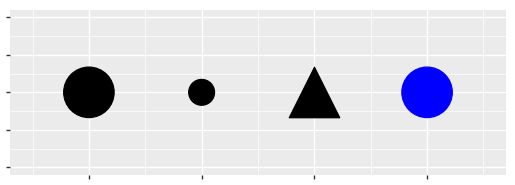

<ggplot: (296220013)>

In [6]:
def no_labels(x) :
    return [""] * len(x)
  
df = pd.DataFrame({"x": [1, 2, 3, 4],
                   "y": [1, 1, 1, 1],
                   "size": [20, 10, 20, 20],
                   "shape": ["o", "o", "^", "o"],
                   "color": ["black", "black", "black", "blue"]})
ggplot(df, aes("x", "y", size="size", shape="shape", color="color")) +\
geom_point() +\
scale_x_continuous(limits=(0.5, 4.5), labels=no_labels) +\
scale_y_continuous(limits=(0.9, 1.1), labels=no_labels) +\
scale_size_identity() +\
scale_shape_identity() +\
scale_color_identity() +\
labs(x=None, y=None) +\
theme(aspect_ratio=1/3)

You can convey information about your data by mapping the aesthetics in your plot to the variables in your dataset. For example, you can map the colors of your points to the `class` variable to reveal the class of each car.

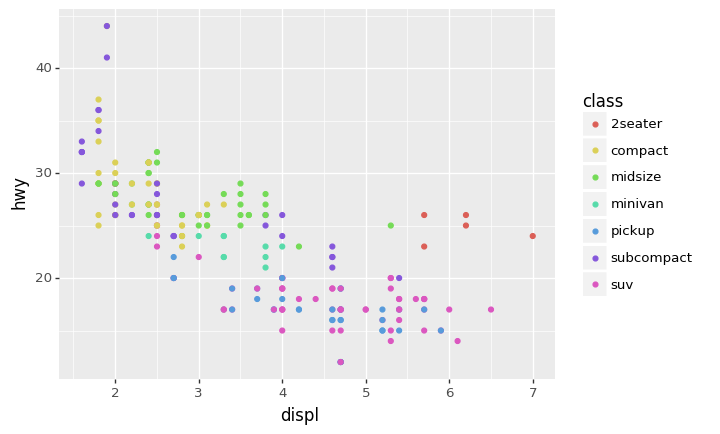

<ggplot: (296610925)>

In [7]:
ggplot(data=mpg) +\
geom_point(mapping=aes(x="displ", y="hwy", color="class"))

(If you prefer British English, like Hadley, you can use `colour` instead of `color`.)

To map an aesthetic to a variable, associate the name of the aesthetic to the name of the variable inside `aes()`. plotnine will automatically assign a unique level of the aesthetic (here a unique color) to each unique value of the variable, a process known as __scaling__. plotnine will also add a legend that explains which levels correspond to which values.

The colors reveal that many of the unusual points are two-seater cars. These cars don't seem like hybrids, and are, in fact, sports cars! Sports cars have large engines like SUVs and pickup trucks, but small bodies like midsize and compact cars, which improves their gas mileage. In hindsight, these cars were unlikely to be hybrids since they have large engines.

In the above example, we mapped `class` to the color aesthetic, but we could have mapped `class` to the size aesthetic in the same way. In this case, the exact size of each point would reveal its class affiliation. We get a _warning_ here, because mapping an unordered variable (`class`) to an ordered aesthetic (`size`) is not a good idea.

/Users/jeroen/repos/datascienceworkshops/r4ds-python-plotnine/venv/lib/python3.7/site-packages/plotnine/scales/scale_size.py:50: PlotnineWarning: Using alpha for a discrete variable is not advised.
  PlotnineWarning


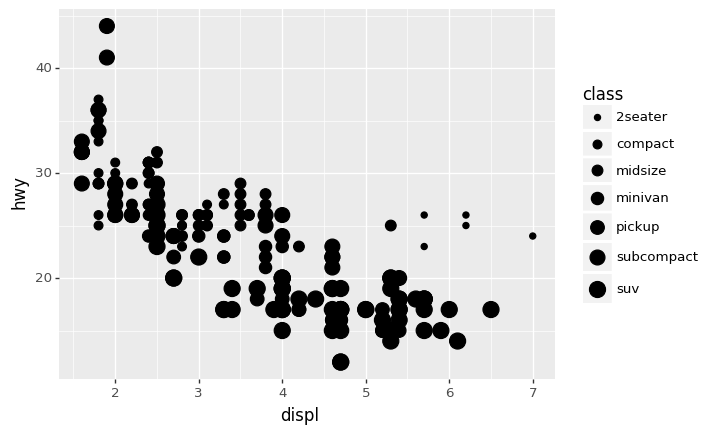

<ggplot: (296496577)>

In [8]:
ggplot(data=mpg) +\
geom_point(mapping=aes(x="displ", y="hwy", size="class"))

Similarly, we could have mapped `manufacturer` to the _alpha_ aesthetic, which controls the transparency of the points, or to the _shape_ aesthetic, which controls the shape of the points.

In [9]:
warnings.filterwarnings("ignore")

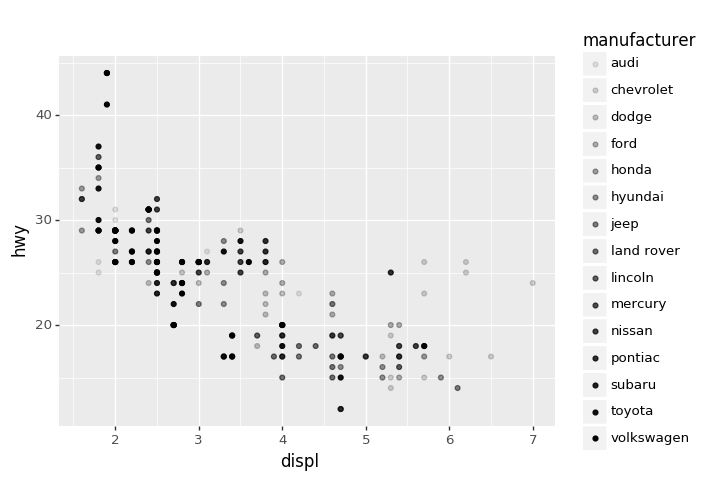

<ggplot: (296903497)>

In [10]:
ggplot(data=mpg) +\
geom_point(mapping=aes(x="displ", y="hwy", alpha="manufacturer"))

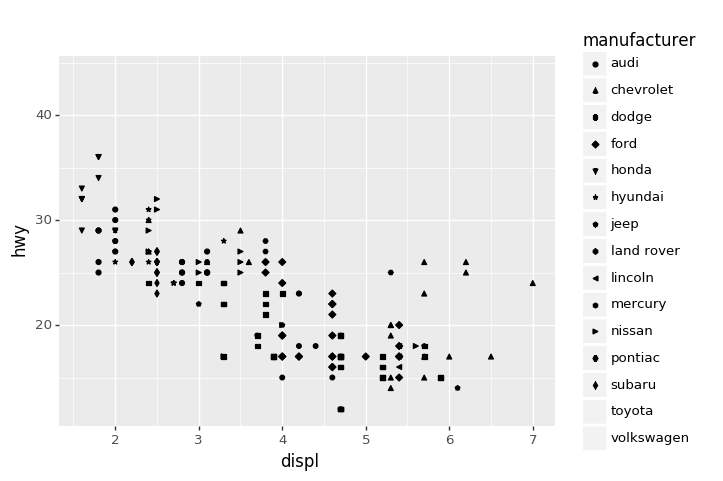

<ggplot: (296536501)>

In [11]:
ggplot(data=mpg) +\
geom_point(mapping=aes(x="displ", y="hwy", shape="manufacturer"))

What happened to Toyota and Volkswagen? plotnine will only use 13 shapes at a time. By default, additional groups will go unplotted when you use the shape aesthetic.

For each aesthetic, you use `aes()` to associate the name of the aesthetic with a variable to display. The `aes()` function gathers together each of the aesthetic mappings used by a layer and passes them to the layer's mapping argument. The syntax highlights a useful insight about `x` and `y`: the x and y locations of a point are themselves aesthetics, visual properties that you can map to variables to display information about the data.

Once you map an aesthetic, plotnine takes care of the rest. It selects a reasonable scale to use with the aesthetic, and it constructs a legend that explains the mapping between levels and values. For x and y aesthetics, plotnine does not create a legend, but it creates an axis line with tick marks and a label. The axis line acts as a legend; it explains the mapping between locations and values.

You can also _set_ the aesthetic properties of your geom manually. For example, we can make all of the points in our plot blue:

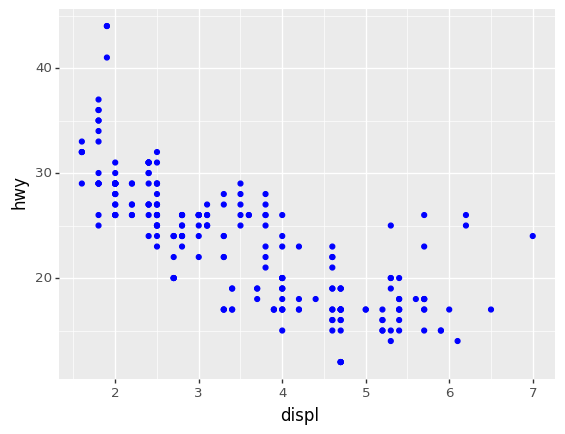

<ggplot: (296934637)>

In [12]:
ggplot(data=mpg) +\
geom_point(mapping=aes(x="displ", y="hwy"), color="blue")

Here, the color doesn't convey information about a variable, but only changes the appearance of the plot. To set an aesthetic manually, set the aesthetic by name as an argument of your geom function; i.e. it goes _outside_ of `aes()`. You'll need to pick a level that makes sense for that aesthetic:

* The name of a color as a string.
* The size of a point in mm.
* The shape of a point as a character or number, as shown below.

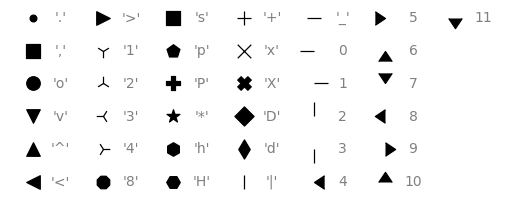

<ggplot: (296220381)>

In [13]:
shapes = [".",",","o","v","^","<",">","1","2","3","4","8","s","p","P","*","h","H","+","x","X","D","d","|","_"] + list(range(12))
labels = ["'" + s + "'" for s in shapes[:25]] + [str(s) for s in range(12)]

df_shapes = pd.DataFrame({"x": [x // 6 for x in range(len(shapes))],
                          "y": [-(y % 6) for y in range(len(shapes))],
                          "shape": shapes,
                          "label": labels})

ggplot(df_shapes, aes("x", "y", shape="shape")) +\
geom_point(size=5) +\
geom_text(aes(label="label"), nudge_x=0.4, size=10, color='grey') +\
scale_shape_identity() +\
theme_void() +\
theme(aspect_ratio=1/2.75)

### [3.3.1](https://r4ds.had.co.nz/data-visualisation.html#exercises-1)&nbsp;&nbsp;&nbsp;Exercises

1.  Which variables in `mpg` are categorical? Which variables are continuous?
    (Hint: type `?mpg` to read the documentation for the dataset). How
    can you see this information when you run `mpg`?

1.  Map a continuous variable to `color`, `size`, and `shape`. How do
    these aesthetics behave differently for categorical vs. continuous
    variables?

1.  What happens if you map the same variable to multiple aesthetics?

1.  What does the `stroke` aesthetic do? What shapes does it work with?
    (Hint: use `?geom_point`)

1.  What happens if you map an aesthetic to something other than a variable
    name, like `aes(colour="displ < 5")`?  Note, you'll also need to specify x and y.

## [3.4](https://r4ds.had.co.nz/data-visualisation.html#common-problems)&nbsp;&nbsp;&nbsp;Common problems

As you start to run Python code, you're likely to run into problems. Don't worry --- it happens to everyone. I have been writing Python code for years, and every day I still write code that doesn't work!

Start by carefully comparing the code that you're running to the code in the book. Python is extremely picky, and a misplaced character can make all the difference. Make sure that every `(` is matched with a `)` and every `"` is paired with another `"`.

One common problem when creating plotnine graphics is to put the `+` in the wrong place: it has to come at the end of the line, not the start. In other words, make sure you haven't accidentally written code like this:

```
ggplot(data=mpg)
+ geom_point(mapping=aes(x=displ, y=hwy))
```

If you're still stuck, try the help. You can get help about any Python function by running `?function_name`. Don't worry if the help doesn't seem that helpful - instead skip down to the examples and look for code that matches what you're trying to do.

If that doesn't help, carefully read the error message. Sometimes the answer will be buried there! But when you're new to Python, the answer might be in the error message but you don't yet know how to understand it. Another great tool is Google: try googling the error message, as it's likely someone else has had the same problem, and has gotten help online.

## [3.5](https://r4ds.had.co.nz/data-visualisation.html#facets)&nbsp;&nbsp;&nbsp;Facets

One way to add additional variables is with aesthetics. Another way, particularly useful for categorical variables, is to split your plot into __facets__, subplots that each display one subset of the data.

To facet your plot by a single variable, use `facet_wrap()`. The first argument of `facet_wrap()` should be a formula, which you create with `~` followed by a variable name (here "formula" is the name of a data structure in Python, not a synonym for "equation"). The variable that you pass to `facet_wrap()` should be discrete.

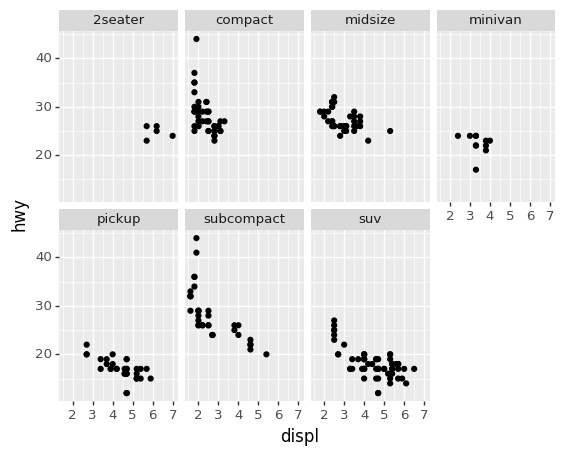

<ggplot: (296160145)>

In [14]:
ggplot(data=mpg) +\
geom_point(mapping=aes(x="displ", y="hwy")) +\
facet_wrap("class", nrow=2)

To facet your plot on the combination of two variables, add `facet_grid()` to your plot call. The first argument of `facet_grid()` is also a formula. This time the formula should contain two variable names separated by a `~`.

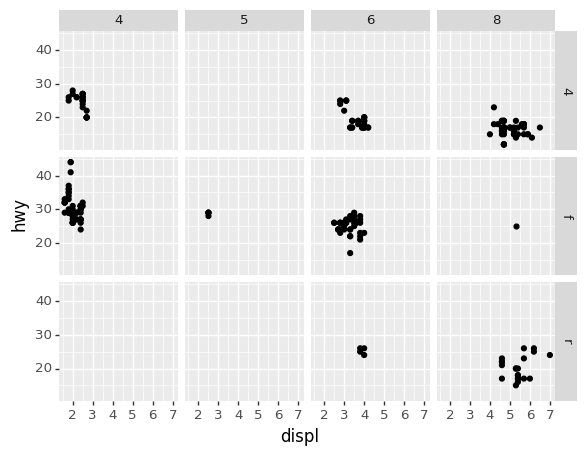

<ggplot: (296941113)>

In [15]:
ggplot(data=mpg) +\
geom_point(mapping=aes(x="displ", y="hwy")) +\
facet_grid("drv ~ cyl")

If you prefer to not facet in the rows or columns dimension, use a `.` instead of a variable name, e.g. `+ facet_grid(". ~ cyl")`.

### [3.5.1](https://r4ds.had.co.nz/data-visualisation.html#exercises-2)&nbsp;&nbsp;&nbsp;Exercises

1.  What happens if you facet on a continuous variable?

2.  What do the empty cells in plot with `facet_grid("drv ~ cyl")` mean?
    How do they relate to this plot?
    
    ```
    ggplot(data=mpg) +\
    geom_point(mapping=aes(x="drv", y="cyl"))
    ```

3.  What plots does the following code make? What does `.` do?

    ```
    ggplot(data=mpg) +\
    geom_point(mapping=aes(x="displ", y="hwy")) +\
    facet_grid("drv ~ .")
    
    ggplot(data=mpg) +\
    geom_point(mapping=aes(x="displ", y="hwy")) +\
    facet_grid(". ~ cyl")
    ```

4.  Take the first faceted plot in this section:

    ```
    ggplot(data=mpg) +\
    geom_point(mapping=aes(x="displ", y="hwy")) +\
    facet_wrap("class", nrow=2)
    ```

    What are the advantages to using faceting instead of the colour aesthetic?
    What are the disadvantages? How might the balance change if you had a
    larger dataset?

5.  Read `?facet_wrap`. What does `nrow` do? What does `ncol` do? What other
    options control the layout of the individual panels? Why doesn't `facet_grid()` have `nrow` and `ncol` arguments?

6.  When using `facet_grid()` you should usually put the variable with more
unique levels in the columns. Why?

## [3.6](https://r4ds.had.co.nz/data-visualisation.html#geometric-objects)&nbsp;&nbsp;&nbsp;Geometric objects

How are these two plots similar?

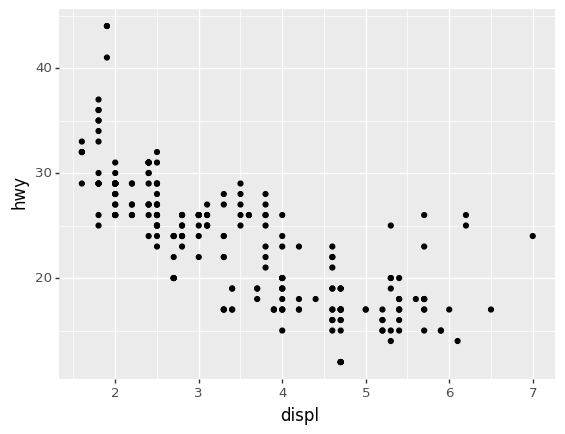

<ggplot: (297770017)>

In [16]:
ggplot(data=mpg) +\
geom_point(mapping=aes(x="displ", y="hwy"))

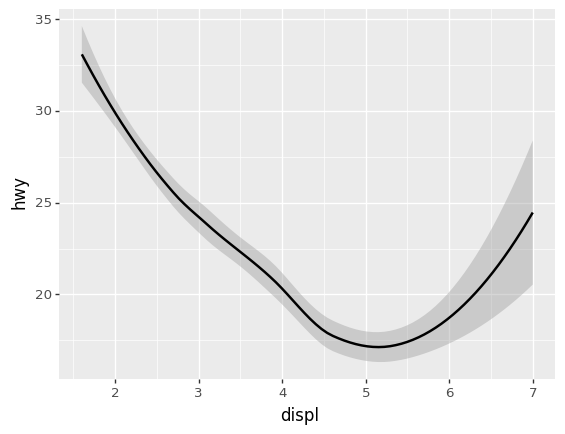

<ggplot: (297401145)>

In [17]:
ggplot(data=mpg) +\
geom_smooth(mapping=aes(x="displ", y="hwy"))

Both plots contain the same x variable, the same y variable, and both describe the same data. But the plots are not identical. Each plot uses a different visual object to represent the data. In plotnine syntax, we say that they use different __geoms__.

A __geom__ is the geometrical object that a plot uses to represent data. People often describe plots by the type of geom that the plot uses. For example, bar charts use bar geoms, line charts use line geoms, boxplots use boxplot geoms, and so on. Scatterplots break the trend; they use the point geom. As we see above, you can use different geoms to plot the same data. The plot on the left uses the point geom, and the plot on the right uses the smooth geom, a smooth line fitted to the data.

To change the geom in your plot, change the geom function that you add to `ggplot()`.

Every geom function in plotnine takes a `mapping` argument. However, not every aesthetic works with every geom. You could set the shape of a point, but you couldn't set the "shape" of a line. On the other hand, you _could_ set the linetype of a line. `geom_smooth()` will draw a different line, with a different linetype, for each unique value of the variable that you map to linetype.

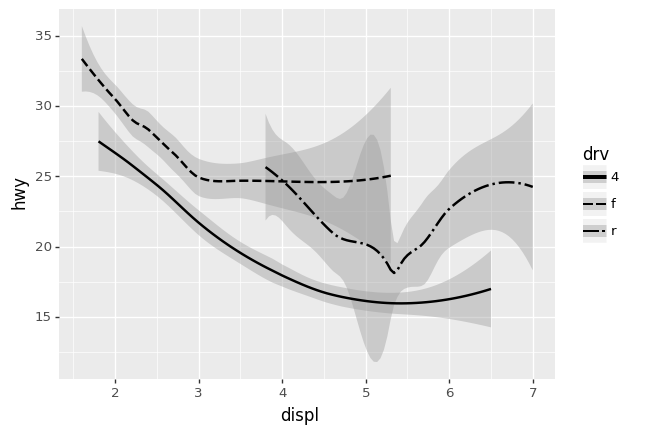

<ggplot: (297980917)>

In [18]:
ggplot(data=mpg) +\
geom_smooth(mapping=aes(x="displ", y="hwy", linetype="drv"))

Here `geom_smooth()` separates the cars into three lines based on their `drv` value, which describes a car's drivetrain. One line describes all of the points with a `4` value, one line describes all of the points with an `f` value, and one line describes all of the points with an `r` value. Here, `4` stands for four-wheel drive, `f` for front-wheel drive, and `r` for rear-wheel drive.

If this sounds strange, we can make it more clear by overlaying the lines on top of the raw data and then coloring everything according to `drv`.

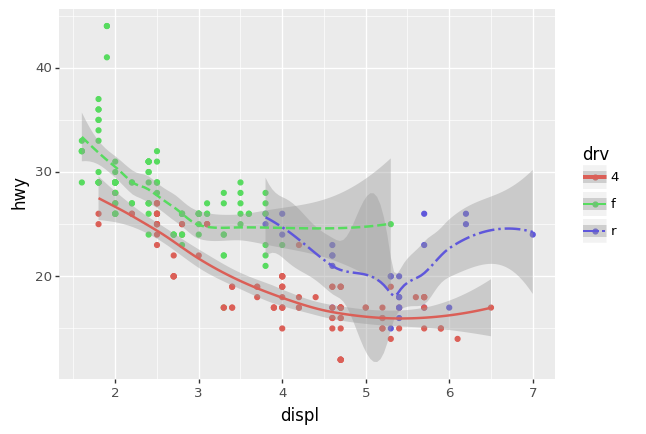

<ggplot: (297804121)>

In [19]:
ggplot(data=mpg, mapping=aes(x="displ", y="hwy", color="drv")) +\
geom_point() +\
geom_smooth(mapping=aes(linetype="drv"))

Notice that this plot contains two geoms in the same graph! If this makes you excited, buckle up. We will learn how to place multiple geoms in the same plot very soon.

plotnine provides over 30 geoms. The best way to get a comprehensive overview is the ggplot2 cheatsheet, which you can find at <http://rstudio.com/cheatsheets>. To learn more about any single geom, use help: `?geom_smooth`.

Many geoms, like `geom_smooth()`, use a single geometric object to display multiple rows of data. For these geoms, you can set the `group` aesthetic to a categorical variable to draw multiple objects. plotnine will draw a separate object for each unique value of the grouping variable. In practice, plotnine will automatically group the data for these geoms whenever you map an aesthetic to a discrete variable (as in the `linetype` example). It is convenient to rely on this feature because the group aesthetic by itself does not add a legend or distinguishing features to the geoms.

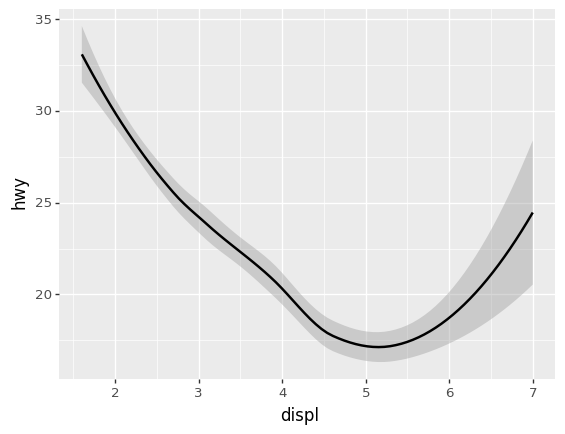

<ggplot: (297818057)>

In [20]:
ggplot(data=mpg) +\
geom_smooth(mapping=aes(x="displ", y="hwy"))

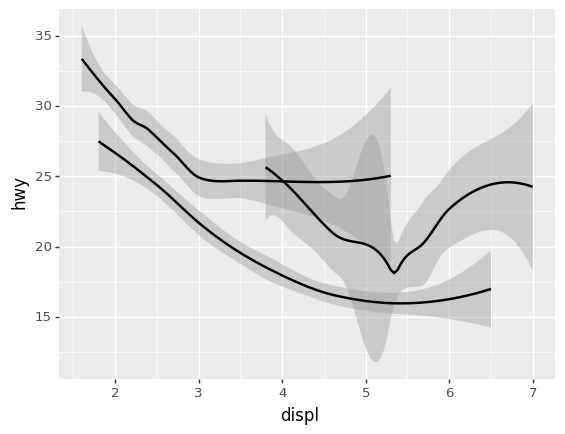

<ggplot: (297811545)>

In [21]:
ggplot(data=mpg) +\
geom_smooth(mapping=aes(x="displ", y="hwy", group="drv"))

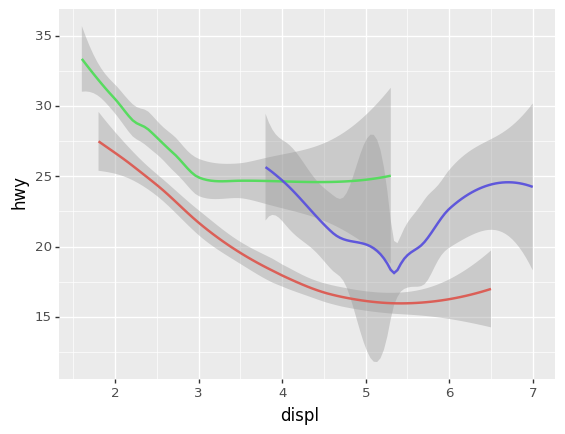

<ggplot: (297557177)>

In [22]:
ggplot(data=mpg) +\
geom_smooth(mapping=aes(x="displ", y="hwy", color="drv"), show_legend=False)

To display multiple geoms in the same plot, add multiple geom functions to `ggplot()`:

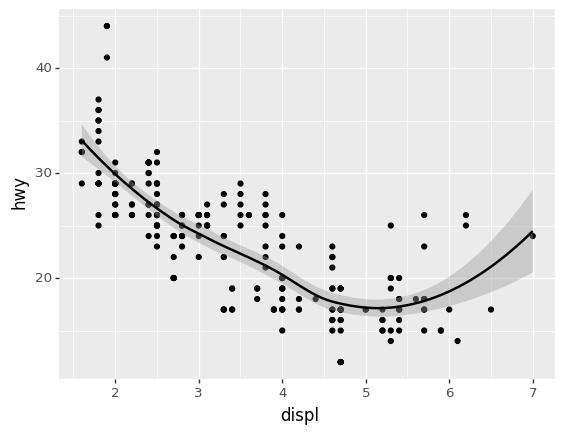

<ggplot: (297827709)>

In [23]:
ggplot(data=mpg) +\
geom_point(mapping=aes(x="displ", y="hwy")) +\
geom_smooth(mapping=aes(x="displ", y="hwy"))

This, however, introduces some duplication in our code. Imagine if you wanted to change the y-axis to display `cty` instead of `hwy`. You'd need to change the variable in two places, and you might forget to update one. You can avoid this type of repetition by passing a set of mappings to `ggplot()`. plotnine will treat these mappings as global mappings that apply to each geom in the graph.  In other words, this code will produce the same plot as the previous code:

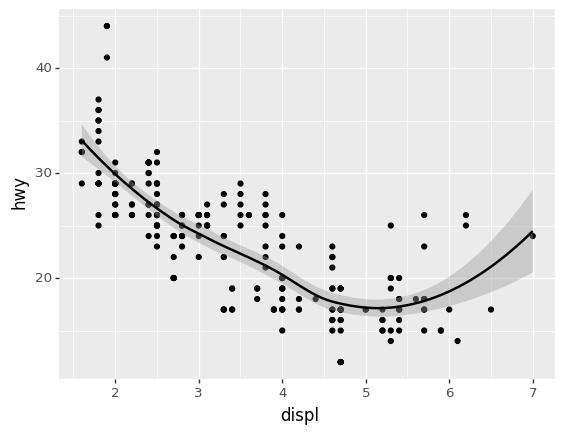

<ggplot: (297323489)>

In [24]:
ggplot(data=mpg, mapping=aes(x="displ", y="hwy")) +\
geom_point() +\
geom_smooth()

If you place mappings in a geom function, plotnine will treat them as local mappings for the layer. It will use these mappings to extend or overwrite the global mappings _for that layer only_. This makes it possible to display different aesthetics in different layers.

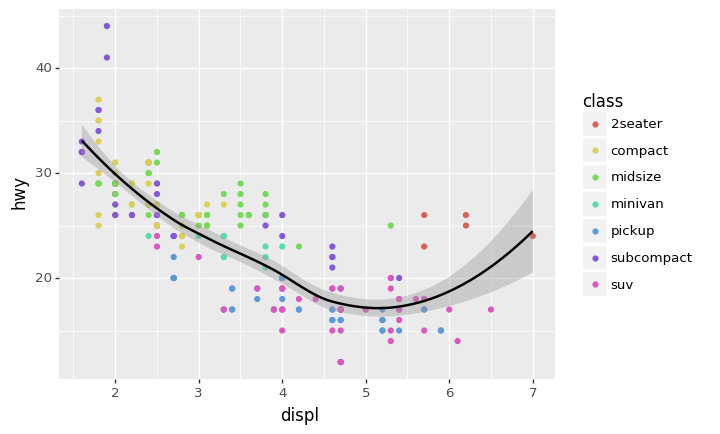

<ggplot: (298329349)>

In [25]:
ggplot(data=mpg, mapping=aes(x="displ", y="hwy")) +\
geom_point(mapping=aes(color="class")) +\
geom_smooth()

You can use the same idea to specify different `data` for each layer. Here, our smooth line displays just a subset of the `mpg` dataset, the subcompact cars. The local data argument in `geom_smooth()` overrides the global data argument in `ggplot()` for that layer only.

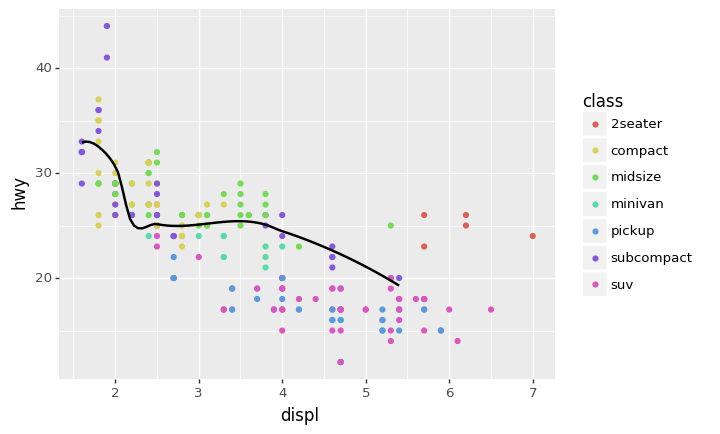

<ggplot: (298430449)>

In [26]:
ggplot(data=mpg, mapping=aes(x="displ", y="hwy")) +\
geom_point(mapping=aes(color="class")) +\
geom_smooth(data=mpg.loc[mpg["class"] == "subcompact"], se=False)

### [3.6.1](https://r4ds.had.co.nz/data-visualisation.html#exercises-3)&nbsp;&nbsp;&nbsp;Exercises

1.  What geom would you use to draw a line chart? A boxplot? A histogram? An area chart?

1.  Run this code in your head and predict what the output will look like.
Then, run the code in Python and check your predictions.

    ```
    ggplot(data=mpg, mapping=aes(x="displ", y="hwy", color="drv")) +\
    geom_point() +\
    geom_smooth(se=False)
    ```

1.  What does `show_legend=False` do?  What happens if you remove it? Why do you think I used it earlier in the chapter?

1.  What does the `se` argument to `geom_smooth()` do?

1.  Will these two graphs look different? Why/why not?

    ```
    ggplot(data=mpg, mapping=aes(x="displ", y="hwy")) +\
    geom_point() +\
    geom_smooth()
    
    ggplot() +\
    geom_point(data=mpg, mapping=aes(x="displ", y="hwy")) +\
    geom_smooth(data=mpg, mapping=aes(x="displ", y="hwy"))
    ```

## [3.7](https://r4ds.had.co.nz/data-visualisation.html#statistical-transformations)&nbsp;&nbsp;&nbsp;Statistical transformations

Next, let's take a look at a bar chart. Bar charts seem simple, but they are interesting because they reveal something subtle about plots. Consider a basic bar chart, as drawn with `geom_bar()`. The following chart displays the total number of diamonds in the `diamonds` dataset, grouped by `cut`. The `diamonds` dataset comes in plotnine and contains information about ~54,000 diamonds, including the `price`, `carat`, `color`, `clarity`, and `cut` of each diamond. The chart shows that more diamonds are available with high quality cuts than with low quality cuts.

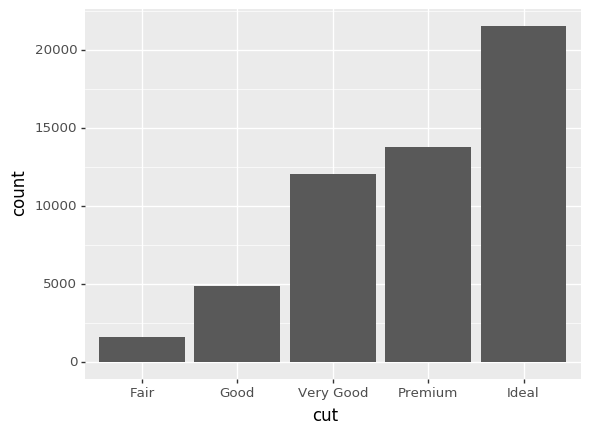

<ggplot: (298309033)>

In [27]:
ggplot(data=diamonds) +\
geom_bar(mapping=aes(x="cut"))

On the x-axis, the chart displays `cut`, a variable from `diamonds`. On the y-axis, it displays count, but count is not a variable in `diamonds`! Where does count come from? Many graphs, like scatterplots, plot the raw values of your dataset. Other graphs, like bar charts, calculate new values to plot:

* bar charts, histograms, and frequency polygons bin your data
  and then plot bin counts, the number of points that fall in each bin.
* smoothers fit a model to your data and then plot predictions from the
  model.
* boxplots compute a robust summary of the distribution and then display a
  specially formatted box.

The algorithm used to calculate new values for a graph is called a __stat__, short for statistical transformation. The figure below describes how this process works with `geom_bar()`.

<img src="../input/images/visualization-stat-bar.png" width="900" style="margin-left: 0px;">

You can learn which stat a geom uses by inspecting the default value for the `stat` argument. For example, `?geom_bar` shows that the default value for `stat` is "count", which means that `geom_bar()` uses `stat_count()`. `stat_count()` is documented on the same page as `geom_bar()`, and if you scroll down you can find a section called "Computed variables". That describes how it computes two new variables: `count` and `prop`.

You can generally use geoms and stats interchangeably. For example, you can recreate the previous plot using `stat_count()` instead of `geom_bar()`:

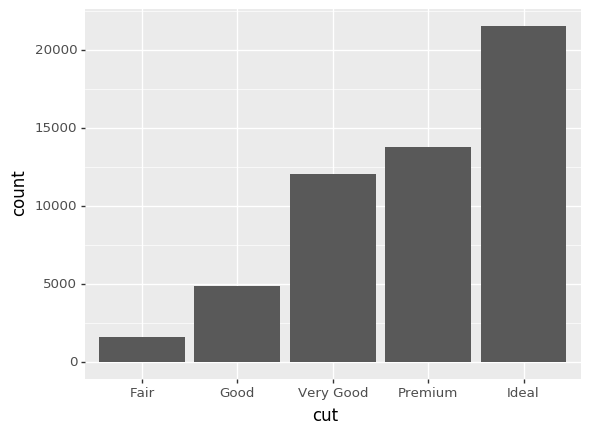

<ggplot: (297053925)>

In [28]:
ggplot(data=diamonds) +\
stat_count(mapping=aes(x="cut"))

This works because every geom has a default stat; and every stat has a default geom. This means that you can typically use geoms without worrying about the underlying statistical transformation. There are three reasons you might need to use a stat explicitly:

1.  You might want to override the default stat. In the code below, I change
    the stat of `geom_bar()` from count (the default) to identity. This lets
    me map the height of the bars to the raw values of a "y" variable.
    Unfortunately when people talk about bar charts casually, they might be
    referring to this type of bar chart, where the height of the bar is already
    present in the data, or the previous bar chart where the height of the bar
    is generated by counting rows.

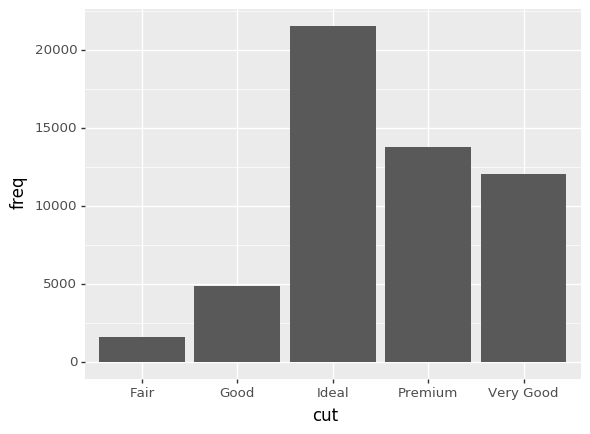

<ggplot: (297716313)>

In [29]:
demo = pd.DataFrame({"cut": ["Fair", "Good", "Very Good", "Premium", "Ideal"],
                         "freq": [1610, 4906, 12082, 13791, 21551]})
                         
ggplot(data=demo) +\
geom_bar(mapping=aes(x="cut", y="freq"), stat="identity")

2.  You might want to override the default mapping from transformed variables to aesthetics. For example, you might want to display a bar chart of proportion, rather than count: 

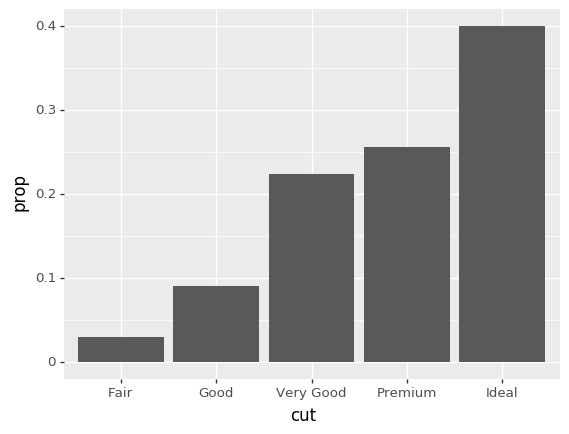

<ggplot: (301079545)>

In [30]:
ggplot(data=diamonds) +\
geom_bar(mapping=aes(x="cut", y="..prop..", group=1))

To find the variables computed by the stat, look for the help section
titled "computed variables".

3.  You might want to draw greater attention to the statistical transformation
in your code. For example, you might use `stat_summary()`, which
summarises the y values for each unique x value, to draw
attention to the summary that you're computing:

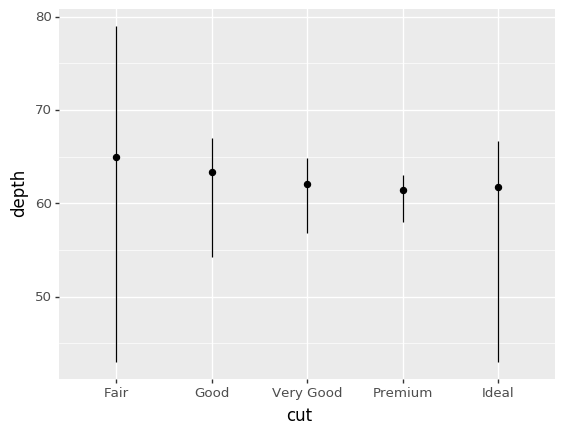

<ggplot: (301067561)>

In [31]:
ggplot(data=diamonds) +\
stat_summary(
        mapping=aes(x="cut", y="depth"),
        fun_ymin=np.min,
        fun_ymax=np.max,
        fun_y=np.median
)

plotnine provides over 20 stats for you to use. Each stat is a function, so you can get help in the usual way, e.g. `?stat_bin`. To see a complete list of stats, try the ggplot2 cheatsheet.

### [3.7.1](https://r4ds.had.co.nz/data-visualisation.html#exercises-4)&nbsp;&nbsp;&nbsp;Exercises

1.  What is the default geom associated with `stat_summary()`? How could
    you rewrite the previous plot to use that geom function instead of the
    stat function?
    
2.  What does `geom_col()` do? How is it different to `geom_bar()`?

3.  Most geoms and stats come in pairs that are almost always used in
    concert. Read through the documentation and make a list of all the
    pairs. What do they have in common?

4.  What variables does `stat_smooth()` compute? What parameters control
    its behaviour?

5.  In our proportion bar chart, we need to set `group=1`. Why? In other
    words what is the problem with these two graphs?

    ```
    ggplot(data=diamonds) +\
    geom_bar(mapping=aes(x="cut", y="..prop.."))
    
    ggplot(data=diamonds) +\
    geom_bar(mapping=aes(x="cut", fill="color", y="..prop.."))
    ```

## [3.8](https://r4ds.had.co.nz/data-visualisation.html#position-adjustments)&nbsp;&nbsp;&nbsp;Position adjustments

There's one more piece of magic associated with bar charts. You can colour a bar chart using either the `colour` aesthetic, or, more usefully, `fill`:

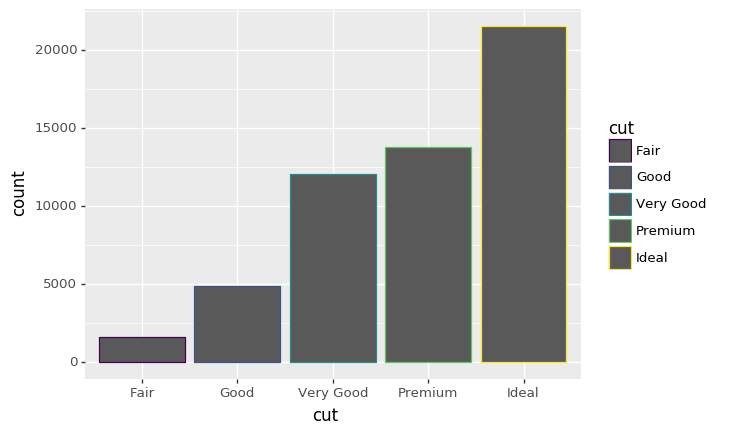

<ggplot: (297065237)>

In [32]:
ggplot(data=diamonds) +\
geom_bar(mapping=aes(x="cut", colour="cut"))

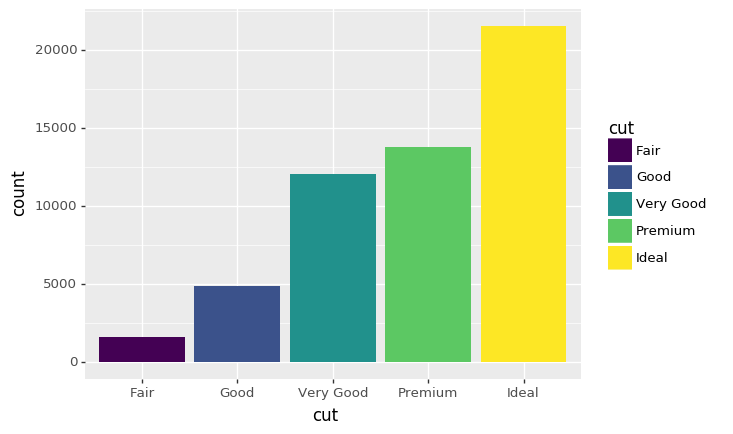

<ggplot: (300939965)>

In [33]:
ggplot(data=diamonds) +\
geom_bar(mapping=aes(x="cut", fill="cut"))

Note what happens if you map the fill aesthetic to another variable, like `clarity`: the bars are automatically stacked. Each colored rectangle represents a combination of `cut` and `clarity`.

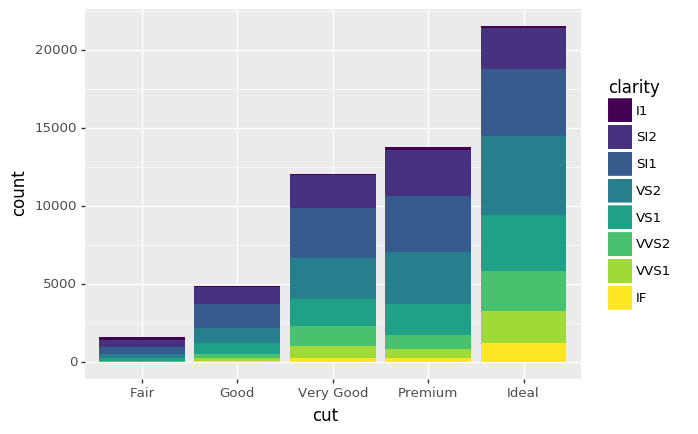

<ggplot: (297020825)>

In [34]:
ggplot(data=diamonds) +\
geom_bar(mapping=aes(x="cut", fill="clarity"))

The stacking is performed automatically by the __position adjustment__ specified by the `position` argument. If you don't want a stacked bar chart, you can use one of three other options: `"identity"`, `"dodge"` or `"fill"`.

*   `position="identity"` will place each object exactly where it falls in
    the context of the graph. This is not very useful for bars, because it
    overlaps them. To see that overlapping we either need to make the bars
    slightly transparent by setting `alpha` to a small value, or completely
    transparent by setting `fill=None`.

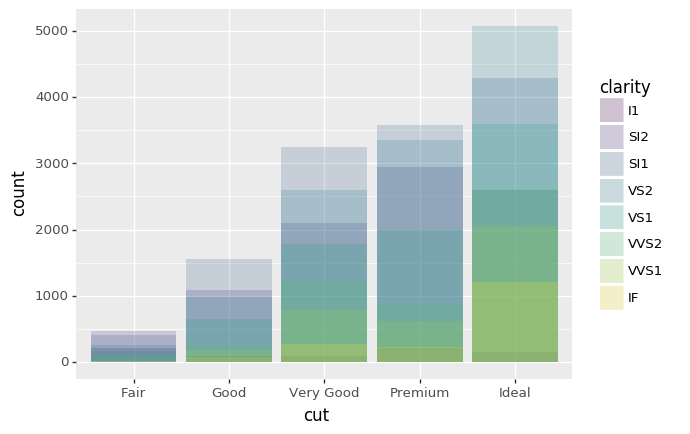

<ggplot: (301091673)>

In [35]:
ggplot(data=diamonds, mapping=aes(x="cut", fill="clarity")) +\
geom_bar(alpha=1/5, position="identity")

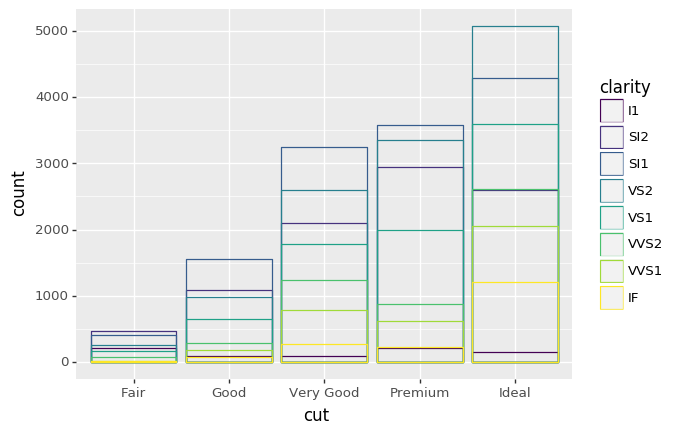

<ggplot: (300993093)>

In [36]:
ggplot(data=diamonds, mapping=aes(x="cut", colour="clarity")) +\
geom_bar(fill=None, position="identity")

    The identity position adjustment is more useful for 2d geoms, like points,
    where it is the default.

*   `position="fill"` works like stacking, but makes each set of stacked bars
    the same height. This makes it easier to compare proportions across
    groups.

    ```{python}
ggplot(data=diamonds) +\
geom_bar(mapping=aes(x="cut", fill="clarity"), position="fill")
    ```

*   `position="dodge"` places overlapping objects directly _beside_ one
    another. This makes it easier to compare individual values.

    ```{python}
ggplot(data=diamonds) +\
geom_bar(mapping=aes(x="cut", fill="clarity"), position="dodge")
    ```

There's one other type of adjustment that's not useful for bar charts, but it can be very useful for scatterplots. Recall our first scatterplot. Did you notice that the plot displays only 126 points, even though there are 234 observations in the dataset?

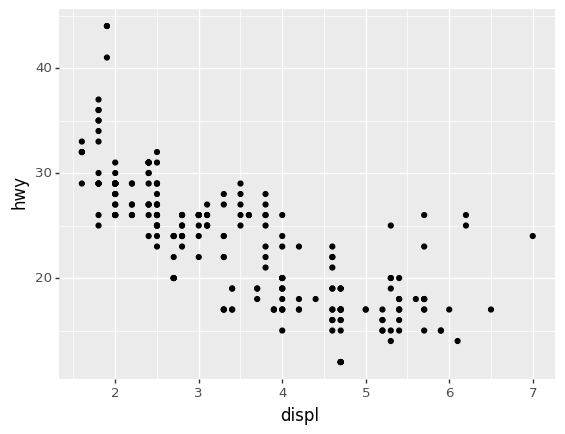

<ggplot: (301047225)>

In [37]:
ggplot(data=mpg) +\
geom_point(mapping=aes(x="displ", y="hwy"))

The values of `hwy` and `displ` are rounded so the points appear on a grid and many points overlap each other. This problem is known as __overplotting__. This arrangement makes it hard to see where the mass of the data is. Are the data points spread equally throughout the graph, or is there one special combination of `hwy` and `displ` that contains 109 values?

You can avoid this gridding by setting the position adjustment to "jitter".  `position="jitter"` adds a small amount of random noise to each point. This spreads the points out because no two points are likely to receive the same amount of random noise.

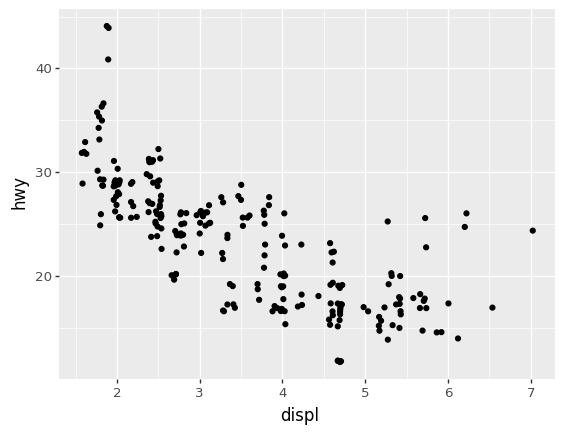

<ggplot: (298662065)>

In [38]:
ggplot(data=mpg) +\
geom_point(mapping=aes(x="displ", y="hwy"), position="jitter")

Adding randomness seems like a strange way to improve your plot, but while it makes your graph less accurate at small scales, it makes your graph _more_ revealing at large scales. Because this is such a useful operation, plotnine comes with a shorthand for `geom_point(position="jitter")`: `geom_jitter()`.

To learn more about a position adjustment, look up the help page associated with each adjustment: `?position_dodge`, `?position_fill`, `?position_identity`, `?position_jitter`, and `?position_stack`.

### [3.8.1](https://r4ds.had.co.nz/data-visualisation.html#exercises-5)&nbsp;&nbsp;&nbsp;Exercises

1.  What is the problem with this plot? How could you improve it?
    ```{python}
ggplot(data=mpg, mapping=aes(x="cty", y="hwy")) +\
geom_point()
    ```
    
1.  What parameters to `geom_jitter()` control the amount of jittering?

1.  Compare and contrast `geom_jitter()` with `geom_count()`.

1.  What's the default position adjustment for `geom_boxplot()`? Create a visualisation of the `mpg` dataset that demonstrates it.

## [3.9](https://r4ds.had.co.nz/data-visualisation.html#coordinate-systems)&nbsp;&nbsp;&nbsp;Coordinate systems

Coordinate systems are probably the most complicated part of plotnine. The default coordinate system is the Cartesian coordinate system where the x and y positions act independently to determine the location of each point. There are a number of other coordinate systems that are occasionally helpful.

*   `coord_flip()` switches the x and y axes. This is useful (for example), if you want horizontal boxplots. It's also useful for long labels: it's hard to get them to fit without overlapping on the x-axis.

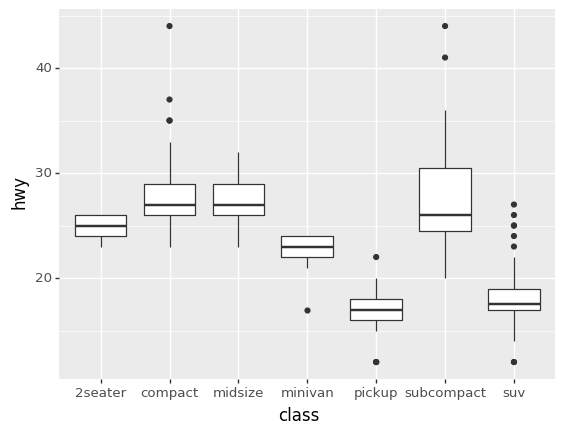

<ggplot: (298522237)>

In [39]:
ggplot(data=mpg, mapping=aes(x="class", y="hwy")) +\
geom_boxplot()

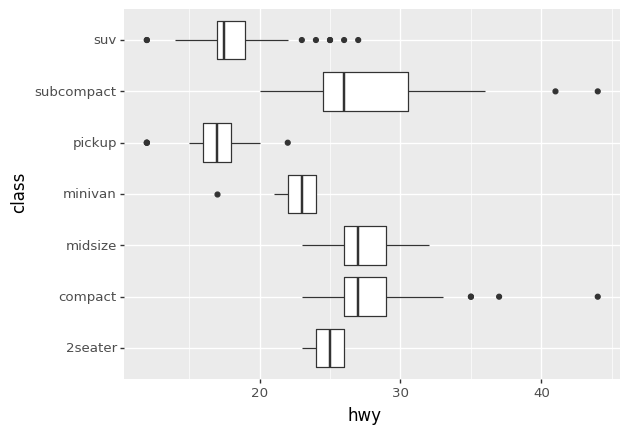

<ggplot: (297414785)>

In [40]:
ggplot(data=mpg, mapping=aes(x="class", y="hwy")) +\
geom_boxplot() +\
coord_flip()

### [3.9.1](https://r4ds.had.co.nz/data-visualisation.html#exercises-6)&nbsp;&nbsp;&nbsp;Exercises

1.  What does `labs()` do? Read the documentation.

1.  What does the plot below tell you about the relationship between city and highway mpg? Why is `coord_fixed()` important? What does `geom_abline()` do?

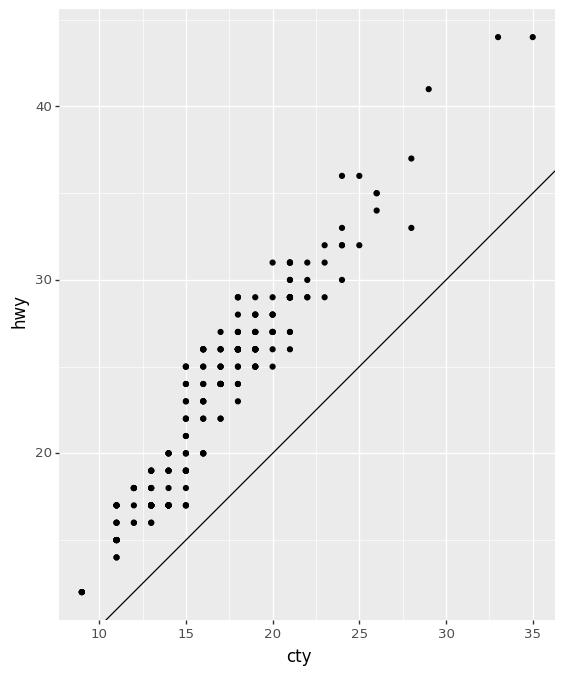

<ggplot: (297999997)>

In [41]:
ggplot(data=mpg, mapping=aes(x="cty", y="hwy")) +\
geom_point() +\
geom_abline() +\
coord_fixed()

## [3.10](https://r4ds.had.co.nz/data-visualisation.html#the-layered-grammar-of-graphics)&nbsp;&nbsp;&nbsp;The layered grammar of graphics

In the previous sections, you learned much more than how to make scatterplots, bar charts, and boxplots. You learned a foundation that you can use to make _any_ type of plot with plotnine. To see this, let's add position adjustments, stats, coordinate systems, and faceting to our code template:

```
ggplot(data=<DATA>) +\
<GEOM_FUNCTION>(
   mapping=aes(<MAPPINGS>),
   stat=<STAT>,
   position=<POSITION>
) +\
<COORDINATE_FUNCTION> +\
<FACET_FUNCTION>
```

Our new template takes seven parameters, the bracketed words that appear in the template. In practice, you rarely need to supply all seven parameters to make a graph because plotnine will provide useful defaults for everything except the data, the mappings, and the geom function.

The seven parameters in the template compose the grammar of graphics, a formal system for building plots. The grammar of graphics is based on the insight that you can uniquely describe _any_ plot as a combination of a dataset, a geom, a set of mappings, a stat, a position adjustment, a coordinate system, and a faceting scheme.

To see how this works, consider how you could build a basic plot from scratch: you could start with a dataset and then transform it into the information that you want to display (with a stat).

<img src="../input/images/visualization-grammar-1.png" width="900" style="margin-left: 0px;">

Next, you could choose a geometric object to represent each observation in the transformed data. You could then use the aesthetic properties of the geoms to represent variables in the data. You would map the values of each variable to the levels of an aesthetic.

<img src="../input/images/visualization-grammar-2.png" width="900" style="margin-left: 0px;">

You'd then select a coordinate system to place the geoms into. You'd use the location of the objects (which is itself an aesthetic property) to display the values of the x and y variables. At that point, you would have a complete graph, but you could further adjust the positions of the geoms within the coordinate system (a position adjustment) or split the graph into subplots (faceting). You could also extend the plot by adding one or more additional layers, where each additional layer uses a dataset, a geom, a set of mappings, a stat, and a position adjustment.

<img src="../input/images/visualization-grammar-3.png" width="900" style="margin-left: 0px;">

You could use this method to build _any_ plot that you imagine. In other words, you can use the code template that you've learned in this chapter to build hundreds of thousands of unique plots.

# [28](https://r4ds.had.co.nz/graphics-for-communication.html)&nbsp;&nbsp;&nbsp;Graphics for communication

## [28.1](https://r4ds.had.co.nz/graphics-for-communication.html#introduction-19)&nbsp;&nbsp;&nbsp;Introduction

Now that you understand your data, you need to _communicate_ your understanding to others. Your audience will likely not share your background knowledge and will not be deeply invested in the data. To help others quickly build up a good mental model of the data, you will need to invest considerable effort in making your plots as self-explanatory as possible. In this chapter, you'll learn some of the tools that plotnine provides to do so.

The rest of this post focuses on the tools you need to create good graphics. I assume that you know what you want, and just need to know how to do it. For that reason, I highly recommend pairing this chapter with a good general visualisation book. I particularly like [_The Truthful Art_](https://amzn.com/0321934075), by Albert Cairo. It doesn't teach the mechanics of creating visualisations, but instead focuses on what you need to think about in order to create effective graphics.

## [28.2](https://r4ds.had.co.nz/graphics-for-communication.html#label)&nbsp;&nbsp;&nbsp;Label

The easiest place to start when turning an exploratory graphic into an expository graphic is with good labels. You add labels with the `labs()` function. This example adds a plot title:

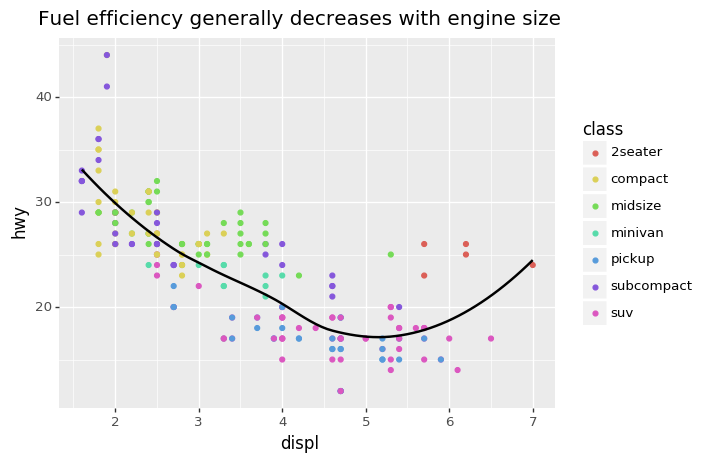

<ggplot: (296278209)>

In [42]:
ggplot(mpg, aes("displ", "hwy")) +\
geom_point(aes(color="class")) +\
geom_smooth(se=False) +\
labs(title="Fuel efficiency generally decreases with engine size")

The purpose of a plot title is to summarise the main finding. Avoid titles that just describe what the plot is, e.g. "A scatterplot of engine displacement vs. fuel economy".

You can also use `labs()` to replace the axis and legend titles. It's usually a good idea to replace short variable names with more detailed descriptions, and to include the units.

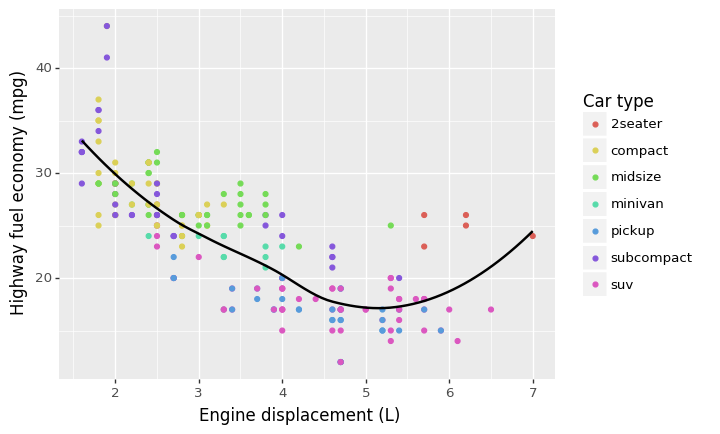

<ggplot: (297630901)>

In [43]:
ggplot(mpg, aes("displ", "hwy")) +\
geom_point(aes(colour="class")) +\
geom_smooth(se=False) +\
labs(x="Engine displacement (L)",
     y="Highway fuel economy (mpg)",
     colour="Car type")

It's possible to use mathematical equations instead of text strings. You have to tell matplotlib, which is used by plotnine to do the actuall plotting, to use LaTeX for rendering text:

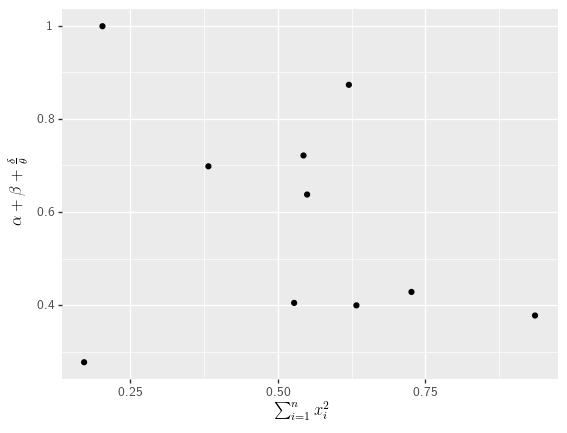

<ggplot: (297748221)>

In [44]:
from matplotlib import rc
rc('text', usetex=True)

df = pd.DataFrame({"x": np.random.uniform(size=10),
                   "y": np.random.uniform(size=10)})

ggplot(df, aes("x", "y")) +\
geom_point() +\
labs(x="$\\sum_{i = 1}^n{x_i^2}$",
     y="$\\alpha + \\beta + \\frac{\\delta}{\\theta}$")

In [45]:
rc('text', usetex=False)

See [the matplotlib documentation](https://matplotlib.org/3.1.1/tutorials/text/mathtext.html) for more information about how to write mathematical equations using LaTeX.

### [28.2.1](https://r4ds.had.co.nz/graphics-for-communication.html#exercises-71)&nbsp;&nbsp;&nbsp;Exercises

1.  Create one plot on the fuel economy data with customised `title`, `x`, `y`, and `colour` labels.

1.  The `geom_smooth()` is somewhat misleading because the `hwy` for large engines is skewed upwards due to the inclusion of lightweight sports cars with big engines. Use your modelling tools to fit and display a better model.

1.  Take an exploratory graphic that you've created in the last month, and add an informative title to make it easier for others to understand.

## [28.3](https://r4ds.had.co.nz/graphics-for-communication.html#annotations)&nbsp;&nbsp;&nbsp;Annotations

In addition to labelling major components of your plot, it's often useful to label individual observations or groups of observations. The first tool you have at your disposal is `geom_text()`. `geom_text()` is similar to `geom_point()`, but it has an additional aesthetic: `label`. This makes it possible to add textual labels to your plots.

There are two possible sources of labels. First, you might have a DataFrame that provides labels. The plot below isn't terribly useful, but it illustrates a useful approach: pull out the most efficient car in each class with pandas, and then label it on the plot:

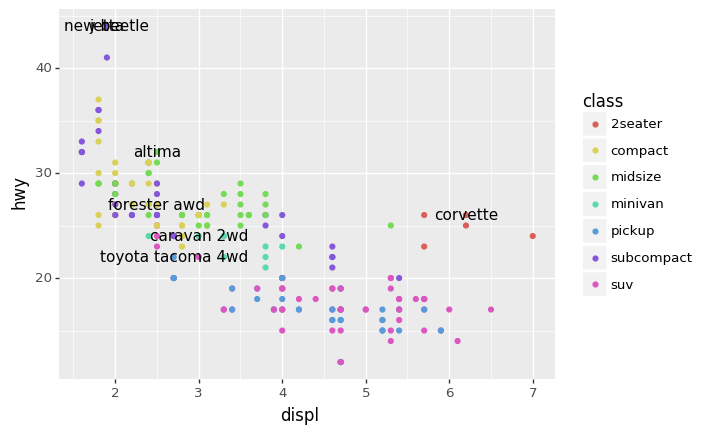

<ggplot: (297753789)>

In [46]:
best_in_class = mpg\
.sort_values(by="hwy", ascending=False)\
.groupby("class")\
.first()

ggplot(mpg, aes("displ", "hwy")) +\
geom_point(aes(colour="class")) +\
geom_text(aes(label="model"), data=best_in_class)

This is hard to read because the labels overlap with each other, and with the points. We can make things a little better by switching to `geom_label()` which draws a rectangle behind the text. We also use the `nudge_y` parameter to move the labels slightly above the corresponding points:

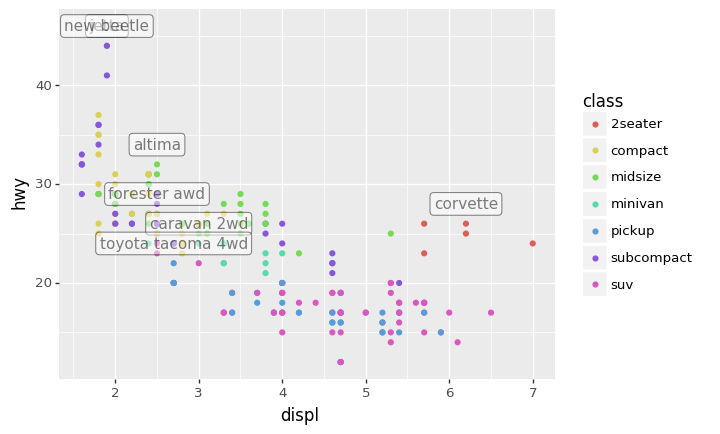

<ggplot: (296898121)>

In [47]:
ggplot(mpg, aes("displ", "hwy")) +\
geom_point(aes(colour="class")) +\
geom_label(aes(label="model"), data=best_in_class, nudge_y=2, alpha=0.5)

That helps a bit, but if you look closely in the top-left hand corner, you'll notice that there are two labels practically on top of each other. This happens because the highway mileage and displacement for the best cars in the compact and subcompact categories are exactly the same. There's no way that we can fix these by applying the same transformation for every label. Instead, we can use the adjust_text argument. This useful argument, which employs the adjustText package under the hood, will automatically adjust labels so that they don't overlap:

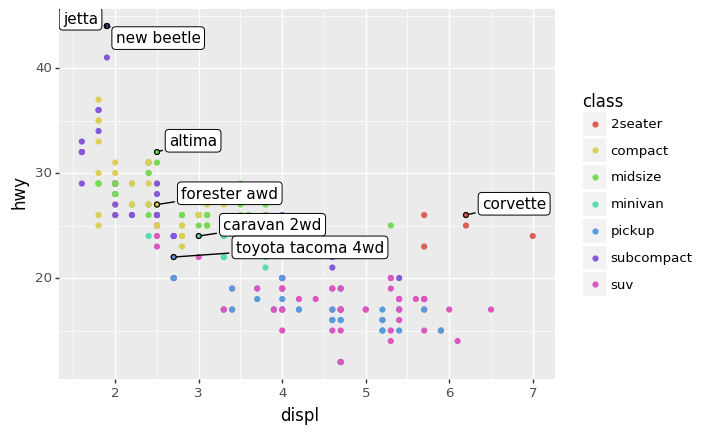

<ggplot: (297827641)>

In [48]:
ggplot(mpg, aes("displ", "hwy")) +\
geom_point(aes(colour="class")) +\
geom_point(data=best_in_class, fill='none') +\
geom_label(aes(label="model"), data=best_in_class, adjust_text={
    'expand_points': (1.5, 1.5),
    'arrowprops': {
        'arrowstyle': '-'
    }})

Note another handy technique used here: I added a second layer of large, hollow points to highlight the points that I've labelled.

You can sometimes use the same idea to replace the legend with labels placed directly on the plot. It's not wonderful for this plot, but it isn't too bad. (`theme(legend_position="none"`) turns the legend off --- we'll talk about it more shortly.)

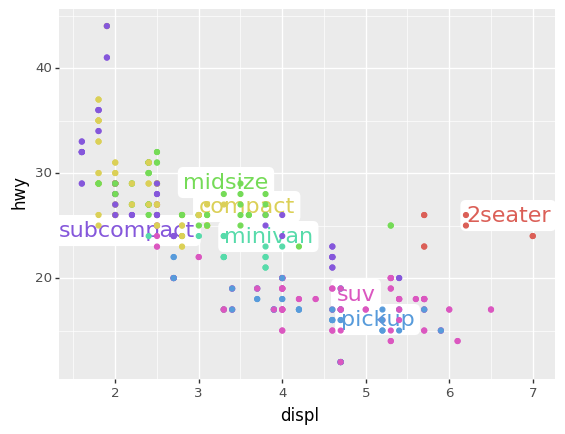

<ggplot: (297403869)>

In [49]:
class_avg = mpg\
.groupby("class")["displ","hwy"].median()\
.reset_index()

ggplot(mpg, aes("displ", "hwy", colour="class")) +\
geom_point() +\
geom_label(aes(label="class"), data=class_avg, size=16, label_size=0, adjust_text={'expand_points': (0, 0)}) +\
geom_point() +\
theme(legend_position="none")

Alternatively, you might just want to add a single label to the plot, but you'll still need to create a DataFrame. Often, you want the label in the corner of the plot, so it's convenient to create a new DataFrame using `pd.DataFrame()` and `max()` to compute the maximum values of x and y.

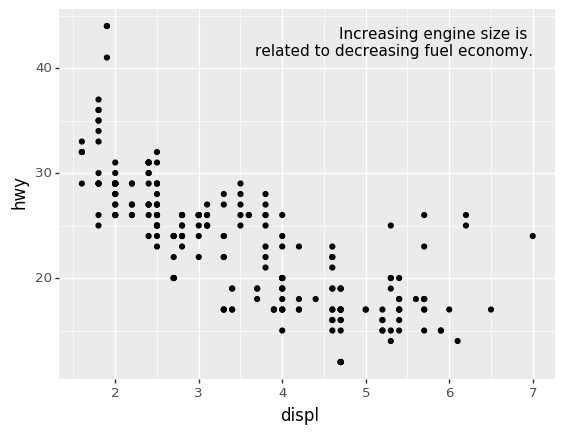

<ggplot: (298225361)>

In [50]:
label = pd.DataFrame({"displ": [mpg.displ.max()],
                      "hwy": [mpg.hwy.max()],
                      "label": "Increasing engine size is \nrelated to decreasing fuel economy."})

ggplot(mpg, aes("displ", "hwy")) +\
geom_point() +\
geom_text(aes(label="label"), data=label, va="top", ha="right")

If you want to place the text exactly on the borders of the plot, you can use `+np.Inf` and `-np.Inf`:

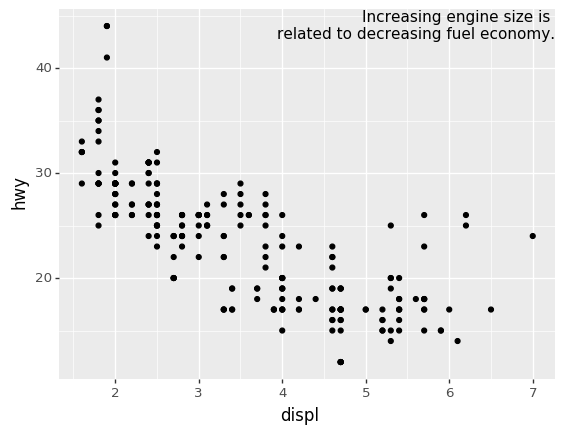

<ggplot: (298234985)>

In [51]:
label = pd.DataFrame({"displ": [np.Inf],
                      "hwy": [np.Inf],
                      "label": "Increasing engine size is \nrelated to decreasing fuel economy."})

ggplot(mpg, aes("displ", "hwy")) +\
geom_point() +\
geom_text(aes(label="label"), data=label, va="top", ha="right")

In these examples, I manually broke the label up into lines using `"\n"`. Another approach is to use the `fill` function from the `textwrap` module to automatically add line breaks, given the number of characters you want per line:

In [52]:
from textwrap import fill

print(fill("Increasing engine size is related to decreasing fuel economy.", width=40))

Increasing engine size is related to
decreasing fuel economy.


Note the use of `ha` and `va` to control the alignment of the label. The figure below shows all nine possible combinations.

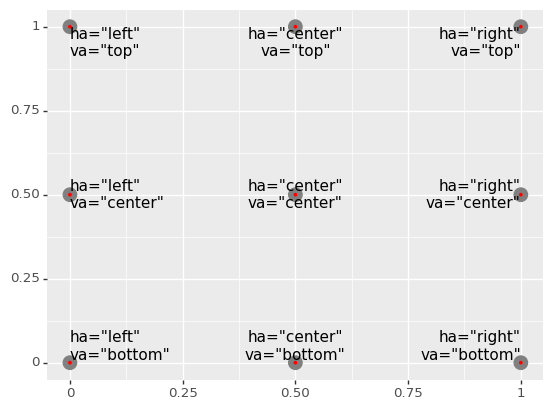

<ggplot: (297316853)>

In [53]:
from itertools import product

has = ["left", "center", "right"]
vas = ["top", "center", "bottom"]
xs = [0, 0.5, 1]
ys = [1, 0.5, 0]

df = pd.DataFrame([{"x": xs[x],
                    "y": ys[y],
                    "ha": has[x],
                    "va": vas[y],
                    "label": f"ha=\"{has[x]}\"\nva=\"{vas[y]}\""}
                   for x, y in product(range(3), repeat=2)])

ggplot(df, aes("x", "y")) +\
geom_point(colour="grey", size=5) +\
geom_point(size=0.5, colour="red") +\
geom_text(aes(label="label", ha="ha", va="va")) +\
labs(x=None, y=None)

Remember, in addition to `geom_text()`, you have many other geoms in plotnine available to help annotate your plot. A few ideas:

*   Use `geom_hline()` and `geom_vline()` to add reference lines. I often make
    them thick (`size=2`) and white (`colour="white"`), and draw them
    underneath the primary data layer. That makes them easy to see, without
    drawing attention away from the data.

*   Use `geom_rect()` to draw a rectangle around points of interest. The
    boundaries of the rectangle are defined by aesthetics `xmin`, `xmax`,
    `ymin`, `ymax`.

*   Use `geom_segment()` with the `arrow` argument to draw attention
    to a point with an arrow. Use aesthetics `x` and `y` to define the
    starting location, and `xend` and `yend` to define the end location.

The only limit is your imagination (and your patience with positioning annotations to be aesthetically pleasing)!

### [28.3.1](https://r4ds.had.co.nz/graphics-for-communication.html#exercises-72)&nbsp;&nbsp;&nbsp;Exercises

1.  Use `geom_text()` with infinite positions to place text at the
    four corners of the plot.

1.  Read the documentation for `annotate()`. How can you use it to add a text
    label to a plot without having to create a tibble?

1.  How do labels with `geom_text()` interact with faceting? How can you
    add a label to a single facet? How can you put a different label in
    each facet? (Hint: think about the underlying data.)

1.  What arguments to `geom_label()` control the appearance of the background
    box?

1.  What are the four arguments to `arrow()`? How do they work? Create a series
    of plots that demonstrate the most important options.

## [28.4](https://r4ds.had.co.nz/graphics-for-communication.html#scales)&nbsp;&nbsp;&nbsp;Scales

The third way you can make your plot better for communication is to adjust the scales. Scales control the mapping from data values to things that you can perceive. Normally, plotnine automatically adds scales for you. For example, when you type:

```python
ggplot(mpg, aes("displ", "hwy")) +\
geom_point(aes(colour="class"))
```

plotnine automatically adds default scales behind the scenes:

```python
ggplot(mpg, aes("displ", "hwy")) +\
geom_point(aes(colour="class")) +\
scale_x_continuous() +\
scale_y_continuous() +\
scale_colour_discrete()
```

Note the naming scheme for scales: `scale_` followed by the name of the aesthetic, then `_`, then the name of the scale. The default scales are named according to the type of variable they align with: continuous, discrete, datetime, or date. There are lots of non-default scales which you'll learn about below.

The default scales have been carefully chosen to do a good job for a wide range of inputs. Nevertheless, you might want to override the defaults for two reasons:

*   You might want to tweak some of the parameters of the default scale.
    This allows you to do things like change the breaks on the axes, or the
    key labels on the legend.

*   You might want to replace the scale altogether, and use a completely
    different algorithm. Often you can do better than the default because
    you know more about the data.

### [28.4.1](https://r4ds.had.co.nz/graphics-for-communication.html#axis-ticks-and-legend-keys)&nbsp;&nbsp;&nbsp;Axis ticks and legend keys

There are two primary arguments that affect the appearance of the ticks on the axes and the keys on the legend: `breaks` and `labels`. Breaks controls the position of the ticks, or the values associated with the keys. Labels controls the text label associated with each tick/key. The most common use of `breaks` is to override the default choice:

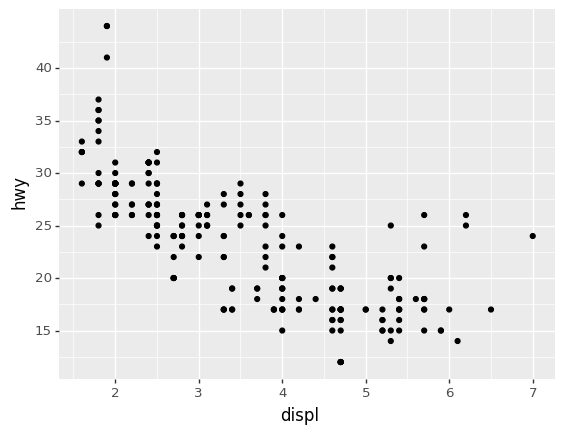

<ggplot: (297026505)>

In [54]:
ggplot(mpg, aes("displ", "hwy")) +\
geom_point() +\
scale_y_continuous(breaks=range(15, 45, 5))

You can use `labels` in the same way (a list of strings the same length as `breaks`), but you can also suppress the labels altogether by passing a list of empty strings. This is useful for maps, or for publishing plots where you can't share the absolute numbers. Note that the list of labels needs to be of the same length as the list of values, so a helper function like `no_labels` is convenient:

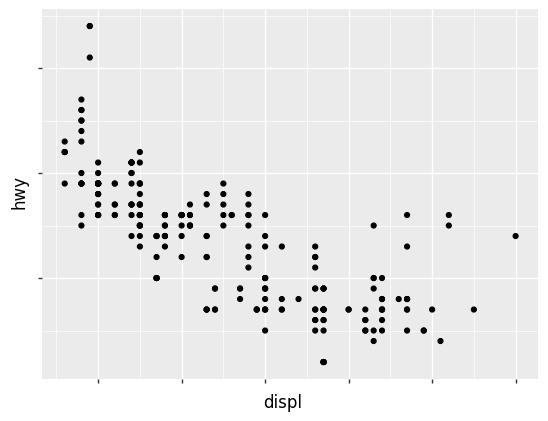

<ggplot: (298225309)>

In [55]:
def no_labels(values):
    return [""] * len(values)

ggplot(mpg, aes("displ", "hwy")) +\
geom_point() +\
scale_x_continuous(labels=no_labels) +\
scale_y_continuous(labels=no_labels)

You can also use `breaks` and `labels` to control the appearance of legends. Collectively axes and legends are called __guides__. Axes are used for x and y aesthetics; legends are used for everything else.

Another use of `breaks` is when you have relatively few data points and want to highlight exactly where the observations occur. For example, take this plot that shows when each US president started and ended their term.

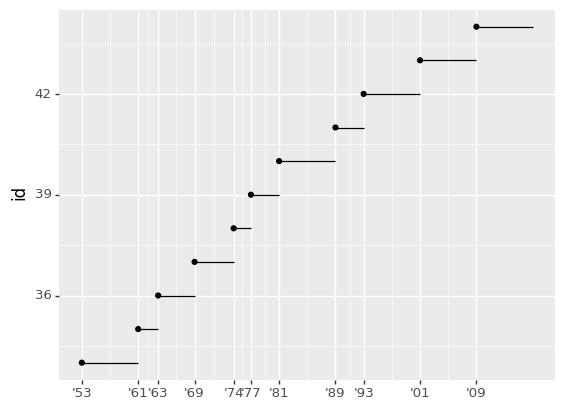

<ggplot: (302386221)>

In [56]:
presidential["id"] = 34 + presidential.index

ggplot(presidential, aes("start", "id")) +\
geom_point() +\
geom_segment(aes(xend="end", yend="id")) +\
scale_x_date(name="", breaks=presidential.start, date_labels="'%y")

Note that the specification of breaks and labels for date and datetime scales is a little different:

* `date_labels` takes a format specification, in the same form as `time.strptime()`.

* `date_breaks` (not shown here), takes a string like "2 days" or "1 month".

### [28.4.2](https://r4ds.had.co.nz/graphics-for-communication.html#legend-layout)&nbsp;&nbsp;&nbsp;Legend layout

You will most often use `breaks` and `labels` to tweak the axes. While they both also work for legends, there are a few other techniques you are more likely to use.

To control the overall position of the legend, you need to use a `theme()` setting. We'll come back to themes at the end of the chapter, but in brief, they control the non-data parts of the plot. The theme setting `legend_position` controls where the legend is drawn. Unfortunately, in order to position the legend correctly on the left or the bottom, we have to be a bit more explicit. Just using "left" and "bottom" may cause the legend to overlap the axis labels. Your milage may vary.

In [57]:
base = ggplot(mpg, aes("displ", "hwy")) +\
geom_point(aes(colour="class"))

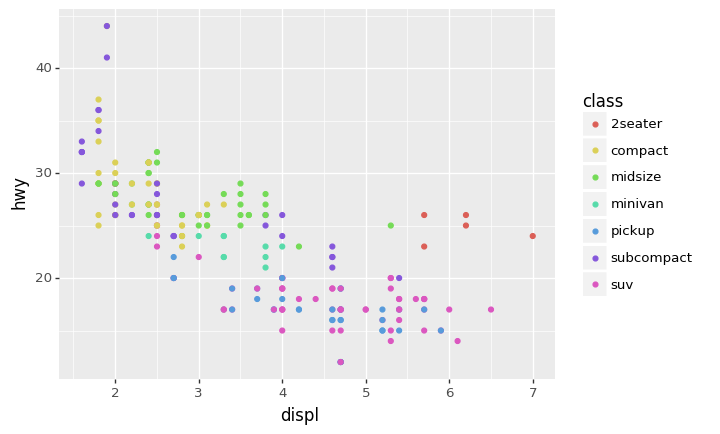

<ggplot: (297822425)>

In [58]:
base + theme(legend_position="right") # the default

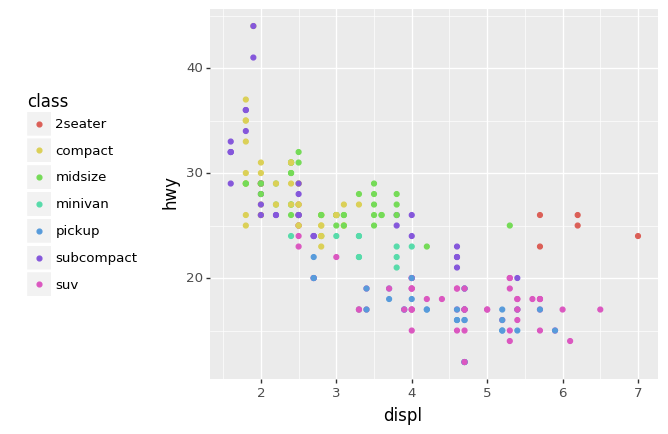

<ggplot: (296390225)>

In [59]:
base + theme(subplots_adjust={'left': 0.2}) + theme(legend_position=(0, 0.5))

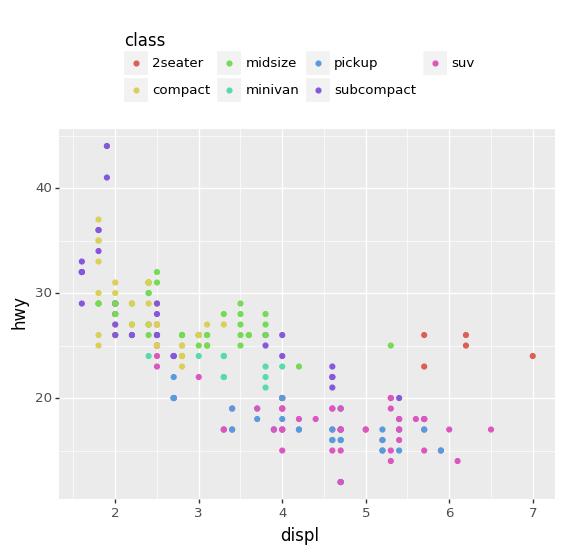

<ggplot: (296924105)>

In [60]:
base + theme(legend_position="top")

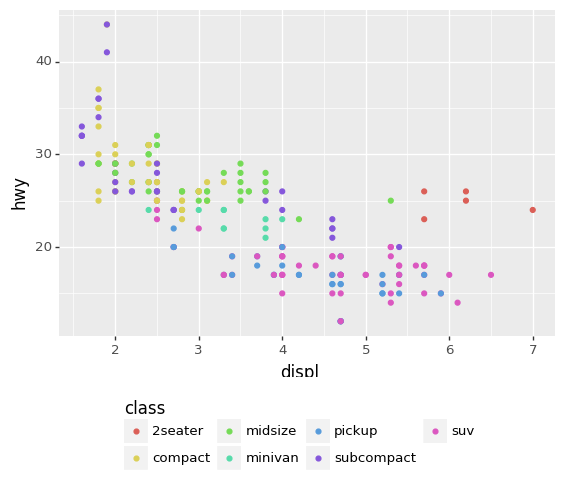

<ggplot: (297531033)>

In [61]:
base + theme(subplots_adjust={'bottom': 0.2}, legend_position=(.5, 0), legend_direction='horizontal')

You can also use `legend_position="none"` to suppress the display of the legend altogether.

To control the display of individual legends, use `guides()` along with `guide_legend()` or `guide_colourbar()`. The following example shows two important settings: controlling the number of rows the legend uses with `nrow`, and overriding one of the aesthetics to make the points bigger. This is particularly useful if you have used a low `alpha` to display many points on a plot.

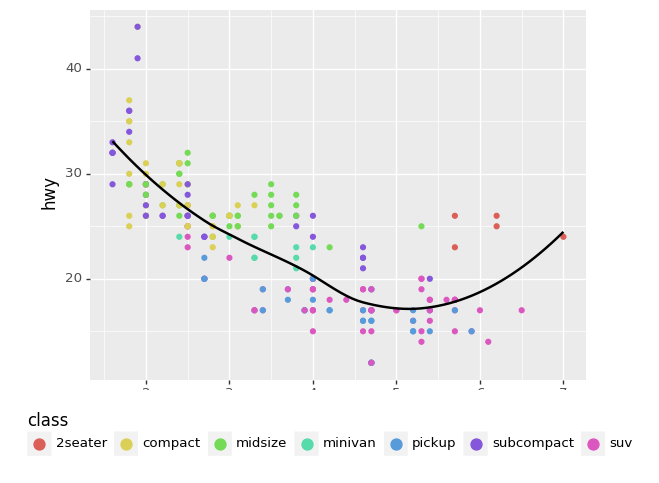

<ggplot: (297818001)>

In [62]:
ggplot(mpg, aes("displ", "hwy")) +\
geom_point(aes(colour="class")) +\
geom_smooth(se=False) +\
theme(legend_position="bottom") +\
guides(colour=guide_legend(nrow=1, override_aes={"size": 4}))

### [28.4.3](https://r4ds.had.co.nz/graphics-for-communication.html#replacing-a-scale)&nbsp;&nbsp;&nbsp;Replacing a scale

Instead of just tweaking the details a little, you can instead replace the scale altogether. There are two types of scales you're mostly likely to want to switch out: continuous position scales and colour scales. Fortunately, the same principles apply to all the other aesthetics, so once you've mastered position and colour, you'll be able to quickly pick up other scale replacements.

It's very useful to plot transformations of your variable. For example, with the `diamonds` DataFrame, it's easier to see the precise relationship between `carat` and `price` if we log transform them:

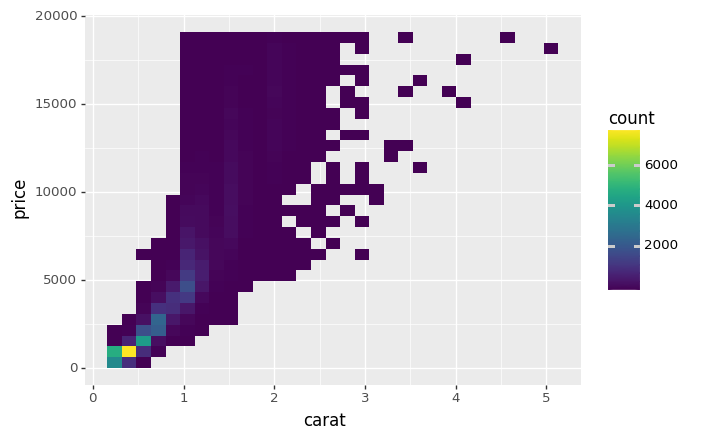

<ggplot: (296474877)>

In [63]:
ggplot(diamonds, aes("carat", "price")) +\
geom_bin2d()

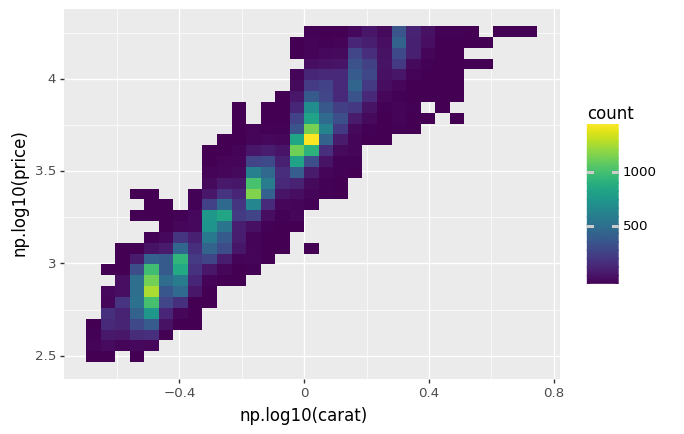

<ggplot: (297753845)>

In [64]:
ggplot(diamonds, aes("np.log10(carat)", "np.log10(price)")) +\
geom_bin2d()

However, the disadvantage of this transformation is that the axes are now labelled with the transformed values, making it hard to interpret the plot. Instead of doing the transformation in the aesthetic mapping, we can instead do it with the scale. This is visually identical, except the axes are labelled on the original data scale.

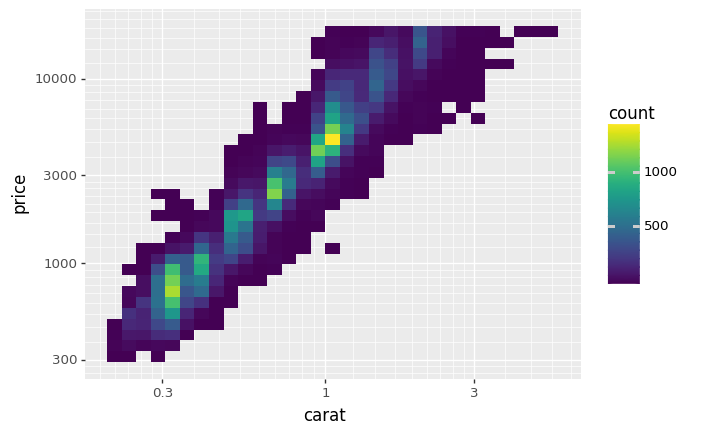

<ggplot: (297998577)>

In [65]:
ggplot(diamonds, aes("carat", "price")) +\
geom_bin2d() +\
scale_x_log10() +\
scale_y_log10()

Another scale that is frequently customised is colour. The default categorical scale picks colours that are evenly spaced around the colour wheel. Useful alternatives are the ColorBrewer scales which have been hand tuned to work better for people with common types of colour blindness. The two plots below look similar, but there is enough difference in the shades of red and green that the dots on the right can be distinguished even by people with red-green colour blindness.

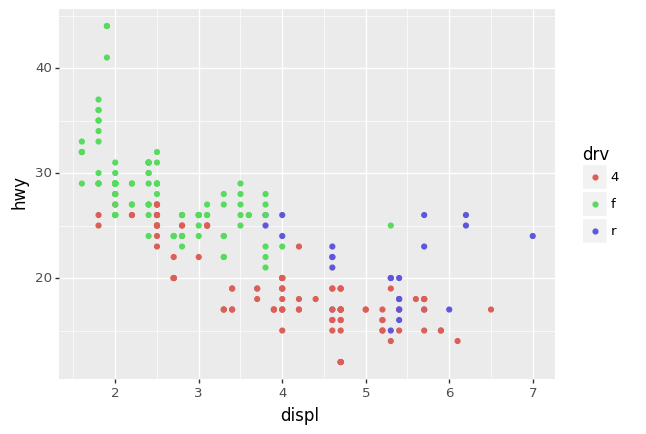

<ggplot: (298536485)>

In [66]:
ggplot(mpg, aes("displ", "hwy")) +\
geom_point(aes(color="drv"))

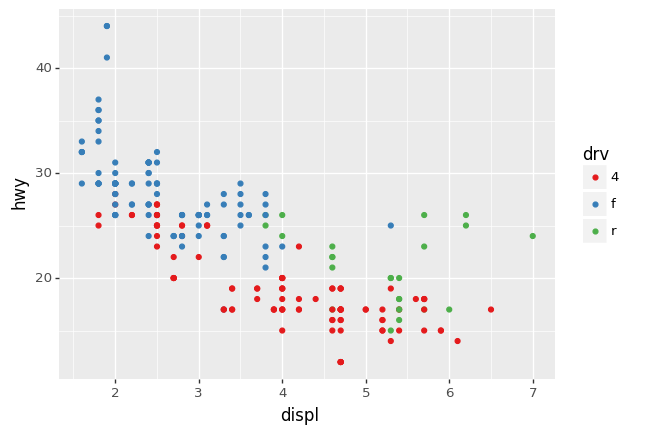

<ggplot: (297375361)>

In [67]:
ggplot(mpg, aes("displ", "hwy")) +\
geom_point(aes(color="drv")) +\
scale_colour_brewer(type="qual", palette="Set1")

Don't forget simpler techniques. If there are just a few colours, you can add a redundant shape mapping. This will also help ensure your plot is interpretable in black and white.

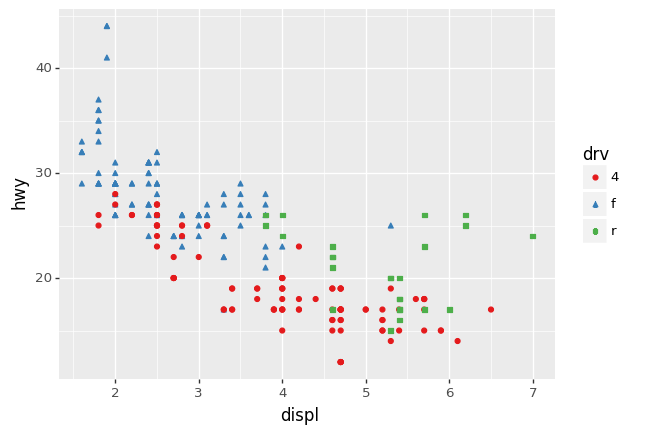

<ggplot: (296481441)>

In [68]:
ggplot(mpg, aes("displ", "hwy")) +\
geom_point(aes(color="drv", shape="drv")) +\
scale_colour_brewer(type="qual", palette="Set1")

The ColorBrewer scales are documented online at <http://colorbrewer2.org/> and made available in Python via the __mizani__ package, by Hassan Kibirige. The figure below shows the complete list of all palettes. The sequential (top) and diverging (bottom) palettes are particularly useful if your categorical values are ordered, or have a "middle". This often arises if you've used `pd.cut()` to make a continuous variable into a categorical variable.

<img src="../input/images/brewer-1.png" width="400" style="margin-left: 0px;">

When you have a predefined mapping between values and colours, use `scale_colour_manual()`. For example, if we map presidential party to colour, we want to use the standard mapping of red for Republicans and blue for Democrats:

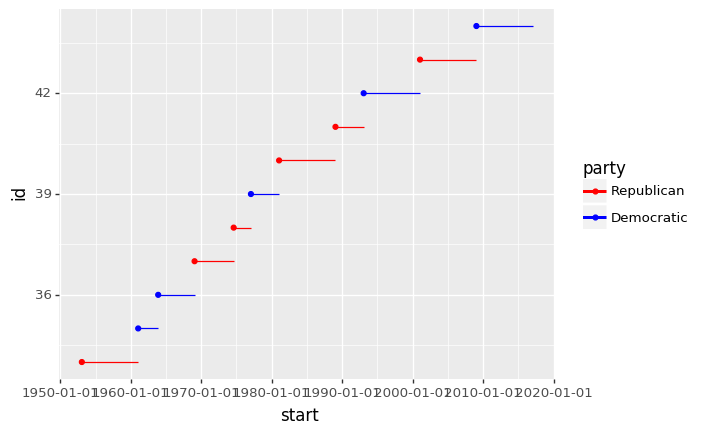

<ggplot: (301086077)>

In [69]:
presidential["id"] = 34 + presidential.index

ggplot(presidential, aes("start", "id", colour="party")) +\
geom_point() +\
geom_segment(aes(xend="end", yend="id")) +\
scale_colour_manual(values=["red", "blue"], limits=["Republican", "Democratic"])

For continuous colour, you can use the built-in `scale_colour_gradient()` or `scale_fill_gradient()`. If you have a diverging scale, you can use `scale_colour_gradient2()`. That allows you to give, for example, positive and negative values different colours. That's sometimes also useful if you want to distinguish points above or below the mean.

Note that all colour scales come in two variety: `scale_colour_x()` and `scale_fill_x()` for the `colour` and `fill` aesthetics respectively (the colour scales are available in both UK and US spellings).

### [28.4.4](https://r4ds.had.co.nz/graphics-for-communication.html#exercises-73)&nbsp;&nbsp;&nbsp;Exercises

1.  Why doesn't the following code override the default scale?
    ```python
    ggplot(df, aes("x", "y")) +\
    geom_hex() +\
    scale_colour_gradient(low="white", high="red") +\
    coord_fixed()
    ```

1.  What is the first argument to every scale? How does it compare to `labs()`?

1.  Change the display of the presidential terms by:

    1. Combining the two variants shown above.
    1. Improving the display of the y axis.
    1. Labelling each term with the name of the president.
    1. Adding informative plot labels.
    1. Placing breaks every 4 years (this is trickier than it seems!).

1.  Use `override_aes` to make the legend on the following plot easier to see.

    ```{python}
    ggplot(diamonds, aes("carat", "price")) +\
    geom_point(aes(colour="cut"), alpha=1/20)
    ```

## [28.5](https://r4ds.had.co.nz/graphics-for-communication.html#zooming)&nbsp;&nbsp;&nbsp;Zooming

There are three ways to control the plot limits:

1. Adjusting what data are plotted
1. Setting the limits in each scale
1. Setting `xlim` and `ylim` in `coord_cartesian()`

To zoom in on a region of the plot, it's generally best to use `coord_cartesian()`. Compare the following two plots:

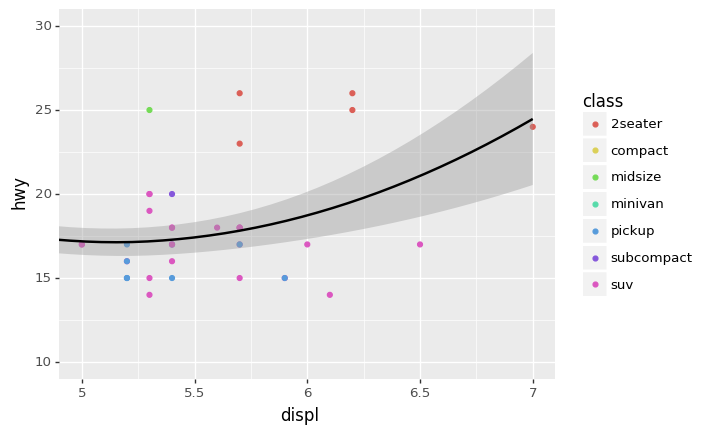

<ggplot: (297021581)>

In [70]:
ggplot(mpg, aes("displ", "hwy")) +\
geom_point(aes(color="class")) +\
geom_smooth() +\
coord_cartesian(xlim=(5, 7), ylim=(10, 30))

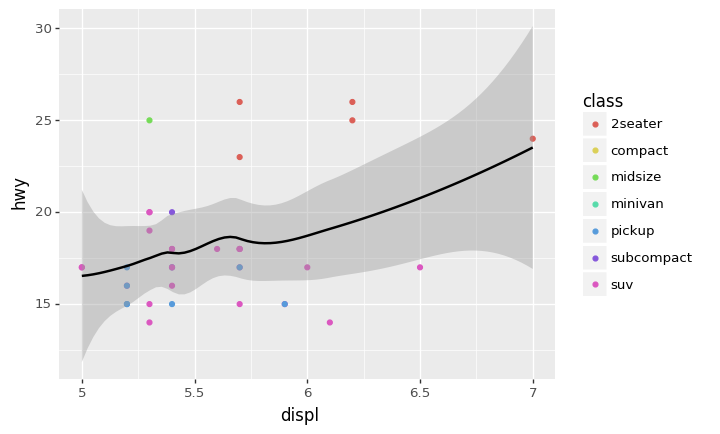

<ggplot: (297375457)>

In [71]:
ggplot(mpg.query("5 <= displ <= 7 and 10 <= hwy <= 30"), aes("displ", "hwy")) +\
geom_point(aes(color="class")) +\
geom_smooth()

You can also set the `limits` on individual scales. Reducing the limits is basically equivalent to subsetting the data. It is generally more useful if you want _expand_ the limits, for example, to match scales across different plots. For example, if we extract two classes of cars and plot them separately, it's difficult to compare the plots because all three scales (the x-axis, the y-axis, and the colour aesthetic) have different ranges.

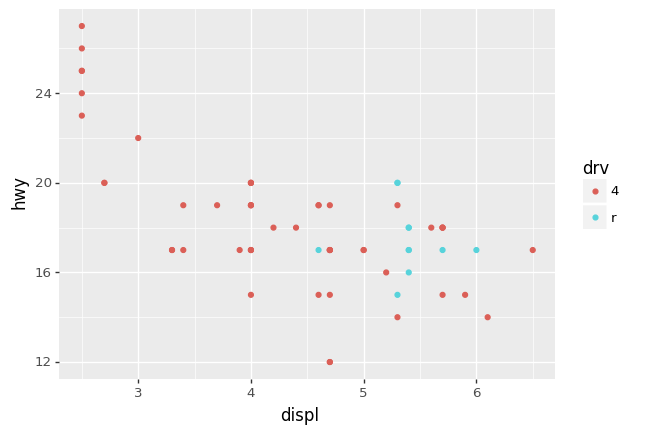

<ggplot: (298684389)>

In [72]:
mpg["drv"] = mpg["drv"].astype(str)
suv = mpg[mpg["class"] == "suv"]
compact = mpg[mpg["class"] == "compact"]

ggplot(suv, aes("displ", "hwy", colour="drv")) +\
geom_point()

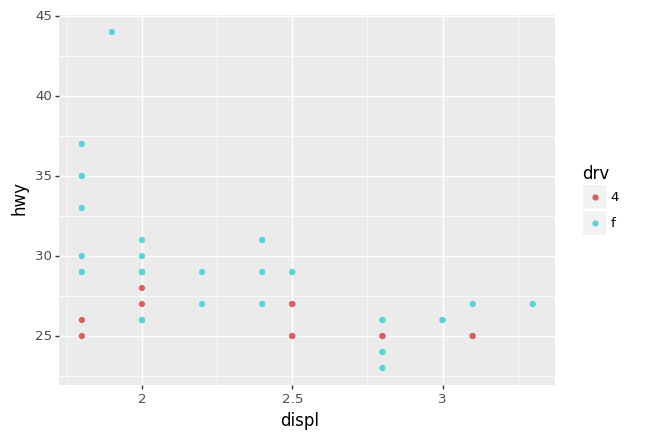

<ggplot: (297762973)>

In [73]:
ggplot(compact, aes("displ", "hwy", colour="drv")) +\
geom_point()

One way to overcome this problem is to share scales across multiple plots, training the scales with the `limits` of the full data.

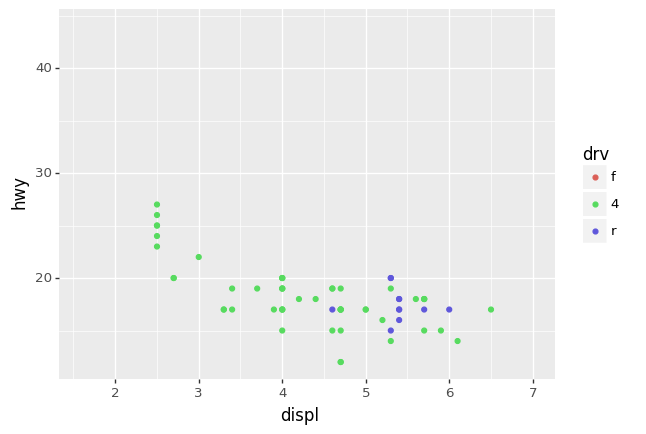

<ggplot: (298681049)>

In [74]:
x_scale = scale_x_continuous(limits=(mpg.displ.min(), mpg.displ.max()))
y_scale = scale_y_continuous(limits=(mpg.hwy.min(), mpg.hwy.max()))
col_scale = scale_colour_discrete(limits=mpg.drv.unique())

ggplot(suv, aes("displ", "hwy", colour="drv")) +\
geom_point() +\
x_scale +\
y_scale +\
col_scale

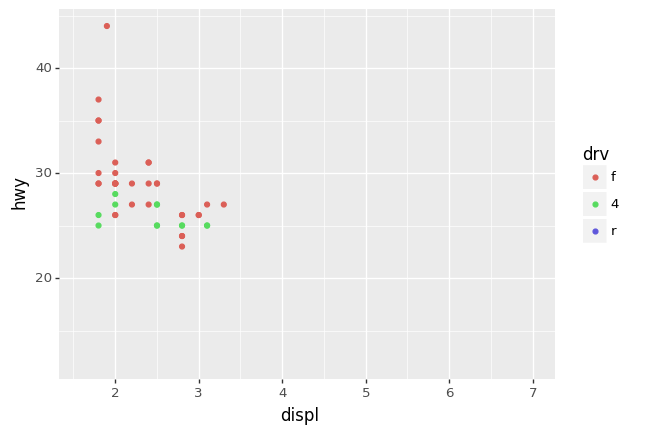

<ggplot: (296932317)>

In [75]:
ggplot(compact, aes("displ", "hwy", colour="drv")) +\
geom_point() +\
x_scale +\
y_scale +\
col_scale

In this particular case, you could have simply used faceting, but this technique is useful more generally, if for instance, you want spread plots over multiple pages of a report.

## [28.6](https://r4ds.had.co.nz/graphics-for-communication.html#themes)&nbsp;&nbsp;&nbsp;Themes

Finally, you can customise the non-data elements of your plot with a theme:

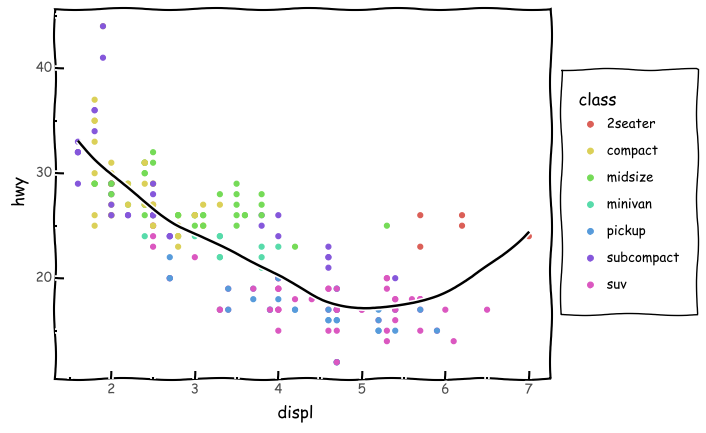

<ggplot: (297531041)>

In [76]:
ggplot(mpg, aes("displ", "hwy")) +\
geom_point(aes(color="class")) +\
geom_smooth(se=False) +\
theme_xkcd()

plotnine includes twelve themes by default. The figure below shows eight of those. The [documentation](https://plotnine.readthedocs.io/en/stable/api.html#themes) lists all available themes.

<img src="../input/images/visualization-themes.png" width="500" style="margin-left: 0px;">

Many people wonder why the default theme has a grey background. This was a deliberate choice because it puts the data forward while still making the grid lines visible. The white grid lines are visible (which is important because they significantly aid position judgements), but they have little visual impact and we can easily tune them out. The grey background gives the plot a similar typographic colour to the text, ensuring that the graphics fit in with the flow of a document without jumping out with a bright white background. Finally, the grey background creates a continuous field of colour which ensures that the plot is perceived as a single visual entity.

It's also possible to control individual components of each theme, like the size and colour of the font used for the y axis. Unfortunately, this level of detail is outside the scope of this book, so you'll need to read the [ggplot2 book](https://amzn.com/331924275X) for the full details. You can also create your own themes, if you are trying to match a particular corporate or journal style.

## [28.7](https://r4ds.had.co.nz/graphics-for-communication.html#saving-your-plots)&nbsp;&nbsp;&nbsp;Saving your plots

## [28.8](https://r4ds.had.co.nz/graphics-for-communication.html#learning-more-4)&nbsp;&nbsp;&nbsp;Learning more

The absolute best place to learn more is the ggplot2 book: [_ggplot2: Elegant graphics for data analysis_](https://amzn.com/331924275X). It goes into much more depth about the underlying theory, and has many more examples of how to combine the individual pieces to solve practical problems. Unfortunately, the book is not available online for free, although you can find the source code at <https://github.com/hadley/ggplot2-book>.
